### <u>Problem Statement</u> <a id='top' />
##### A healthcare organization together with a couple of government hospitals in a city has collected information about the vitals that would reveal if the person might have a coronary heart disease in the next ten years or not. This study is useful in early identification of disease and have medical intervention if necessary. This would help not only in improving the health conditions but also the economy as it has been identified that health performance and economic performance are interlinked. 
##### As a data scientist, you are required to construct a classification model based on the available data and evaluate its efficacy. Your activities should include - performing various activities pertaining to the data such as, preparing the dataset for analysis; checking for any correlations; creating a model; evaluating the performance of the classification model. Visualizations would be a value add. 


# 1.Data Reading

In [1]:
#List of all the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
P5 = pd.read_csv("D:/GIPE SEM 2/Bussiness Analytics/Project 5 (1)/Project 5 Dataset.csv")
P5.head()


ID    IV  A1   A2  A3  A4  A5  A6  A7  A8  ...  A14   A15   A16  A17  \
0  1443894  2049  44  8.0  11   0   0   0   0  38  ...    0  0.52  0.69    0   
1  1810849    48   0  8.0   0   0   0   0   0   1  ...    0  0.59  0.78    1   
2  2264999   318   2  9.0   0   0   0   0   0   0  ...    0  0.94  0.79    1   
3  1931676    62   4  2.0   0   0   0  15  30   7  ...    0  0.51  0.47    0   
4  2070885     2   0  8.0   0   0   0   0   1   0  ...    0  0.82  0.81    0   

   A18  A19  A20        A21  A22  Target  
0    0    0    1  17.078971    0       0  
1    0    0    1  17.022384    0       0  
2    0    0    0  17.024773    0       0  
3    0    0    1  17.074995    0       0  
4    0    0    1  17.072697    0       0  

[5 rows x 25 columns]

# 2. Data Overview

In [3]:
P5.shape

(34281, 25)

In [4]:
print ("\nUnique values :  \n", P5.nunique())


Unique values :  
 ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         102
A16         102
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64


In [5]:
P5.describe()

ID             IV            A1            A2            A3  \
count  3.428100e+04   34281.000000  34281.000000  32538.000000  34281.000000   
mean   1.979838e+06     236.252005     36.126367      7.355185     22.543071   
std    6.384855e+05    3326.574620    427.707021      6.165307    359.486291   
min    1.058628e+06   -2999.000000      0.000000      0.000000      0.000000   
25%    1.464342e+06       2.000000      0.000000      2.000000      0.000000   
50%    1.841719e+06       8.000000      0.000000      8.000000      0.000000   
75%    2.254242e+06      40.000000      4.000000      8.000000      0.000000   
max    3.274754e+06  366924.000000  50547.000000     52.000000  31750.000000   

                 A4             A5             A6             A7  \
count  34281.000000   34281.000000   34281.000000   34281.000000   
mean       1.695371     151.959044     274.418453     387.933637   
std       36.195759    2274.087109    4065.441226    5443.804648   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       2.000000       4.000000   
75%        0.000000      18.000000      33.000000      48.000000   
max     2999.000000  260660.000000  438020.000000  533540.000000   

                 A8  ...           A14           A15           A16  \
count  34281.000000  ...  34281.000000  34281.000000  34281.000000   
mean      36.482746  ...      1.744757     -5.742893     -5.368822   
std      375.931751  ...     26.077507     24.618128     23.938095   
min        0.000000  ...      0.000000    -99.000000    -99.000000   
25%        0.000000  ...      0.000000      0.590000      0.610000   
50%        1.000000  ...      0.000000      0.810000      0.790000   
75%        6.000000  ...      0.000000      0.960000      0.940000   
max    21071.000000  ...   1488.000000      1.000000      1.000000   

                A17           A18           A19           A20           A21  \
count  34281.000000  34281.000000  34281.000000  34281.000000  34281.000000   
mean       0.208658      0.000321      0.131939      0.962370     17.049826   
std        0.406355      0.017910      0.338429      0.190303      0.028818   
min        0.000000      0.000000      0.000000      0.000000     17.000005   
25%        0.000000      0.000000      0.000000      1.000000     17.024869   
50%        0.000000      0.000000      0.000000      1.000000     17.049813   
75%        0.000000      0.000000      0.000000      1.000000     17.074796   
max        1.000000      1.000000      1.000000      1.000000     17.099995   

                A22        Target  
count  34281.000000  34281.000000  
mean       0.000204      0.329424  
std        0.014288      0.470011  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 25 columns]

In [6]:
P5.dtypes

ID          int64
IV          int64
A1          int64
A2        float64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
A11         int64
A12         int64
A13         int64
A14         int64
A15       float64
A16       float64
A17         int64
A18         int64
A19         int64
A20         int64
A21       float64
A22         int64
Target      int64
dtype: object

In [7]:
P5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      32538 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

# 3.Missing/Null Value Treatment

In [8]:
P5[P5.iloc[:,2:] == -9.00] = np.nan
P5[P5.iloc[:,2:] == -99.00] = np.nan
P5[P5.iloc[:,2:] == -999.00] = np.nan
P5[P5.iloc[:,2:] == -9999.00] = np.nan
P5[P5.iloc[:,2:] == -99999.00] = np.nan

print ("\nMissing values :  ", P5.isna().sum().values.sum())
print ("\nMissing Values in each columns : \n", P5.isna().sum())


Missing values :   6079

Missing Values in each columns : 
 ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15       2233
A16       2103
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64


In [9]:
P5["A15"][P5["A15"].isna() == True] = P5["A15"].median()

<ipython-input-9-b141f61b8be4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P5["A15"][P5["A15"].isna() == True] = P5["A15"].median()


In [10]:
P5["A16"][P5["A16"].isna() == True] = P5["A16"].median()

<ipython-input-10-6d0d0114cd89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P5["A16"][P5["A16"].isna() == True] = P5["A16"].median()


In [11]:
print ("\nMissing values :  ", P5.isna().sum().values.sum())
print ("\nMissing Values in each columns : \n", P5.isna().sum())


Missing values :   1743

Missing Values in each columns : 
 ID           0
IV           0
A1           0
A2        1743
A3           0
A4           0
A5           0
A6           0
A7           0
A8           0
A9           0
A10          0
A11          0
A12          0
A13          0
A14          0
A15          0
A16          0
A17          0
A18          0
A19          0
A20          0
A21          0
A22          0
Target       0
dtype: int64


In [12]:
medianA2 = P5["A2"].median()
print(medianA2)
medianA15 = P5['A15'].median(skipna=True)
print (medianA15)
medianA16 = P5['A16'].median(skipna=True)
print (medianA16)

8.0
0.83
0.82


In [13]:
P5=P5.replace(-99,medianA15) 
P5=P5.replace(-99,medianA16) 
P5["A2"].fillna(medianA2, inplace=True)
print (P5)

            ID    IV  A1    A2  A3  A4   A5   A6   A7  A8  ...  A14   A15  \
0      1443894  2049  44   8.0  11   0    0    0    0  38  ...    0  0.52   
1      1810849    48   0   8.0   0   0    0    0    0   1  ...    0  0.59   
2      2264999   318   2   9.0   0   0    0    0    0   0  ...    0  0.94   
3      1931676    62   4   2.0   0   0    0   15   30   7  ...    0  0.51   
4      2070885     2   0   8.0   0   0    0    0    1   0  ...    0  0.82   
...        ...   ...  ..   ...  ..  ..  ...  ...  ...  ..  ...  ...   ...   
34276  1297376     1   0  10.0   0   0    9   14   24   0  ...    0  0.89   
34277  2131919    88   2   4.0   0   0    0    0    0   5  ...    0  0.22   
34278  1466851     1   4   8.0   0   0    0    0   10   2  ...    0  0.99   
34279  1554343     5   0   2.0   0   0    0    0  144   0  ...    0  0.85   
34280  2196772     0  12   2.0   0   0  144  144  144   0  ...    0  0.88   

        A16  A17  A18  A19  A20        A21  A22  Target  
0      0.69    0 

# 4. EXPLORATORY DATA ANALYSIS
### 4.1.Descriptive statistics
### 4.2.Seperating Numerica and Categorical Data 
### 4.3.Covariance Matrix of Numerical Data
### 4.4.Univariate Analysis (Skewness and Kurtosis) Along with removal of Outliers
### 4.5.Bivariate Analysis (Pairplot)
### 4.6.Categorical Data Analysis
### 4.7.PCA


## 4.1.Descriptive statistics

In [14]:
P5.dtypes

ID          int64
IV          int64
A1          int64
A2        float64
A3          int64
A4          int64
A5          int64
A6          int64
A7          int64
A8          int64
A9          int64
A10         int64
A11         int64
A12         int64
A13         int64
A14         int64
A15       float64
A16       float64
A17         int64
A18         int64
A19         int64
A20         int64
A21       float64
A22         int64
Target      int64
dtype: object

In [15]:
P5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      34281 non-null  int64  
 1   IV      34281 non-null  int64  
 2   A1      34281 non-null  int64  
 3   A2      34281 non-null  float64
 4   A3      34281 non-null  int64  
 5   A4      34281 non-null  int64  
 6   A5      34281 non-null  int64  
 7   A6      34281 non-null  int64  
 8   A7      34281 non-null  int64  
 9   A8      34281 non-null  int64  
 10  A9      34281 non-null  int64  
 11  A10     34281 non-null  int64  
 12  A11     34281 non-null  int64  
 13  A12     34281 non-null  int64  
 14  A13     34281 non-null  int64  
 15  A14     34281 non-null  int64  
 16  A15     34281 non-null  float64
 17  A16     34281 non-null  float64
 18  A17     34281 non-null  int64  
 19  A18     34281 non-null  int64  
 20  A19     34281 non-null  int64  
 21  A20     34281 non-null  int64  
 22

In [16]:
print ("\nNull Values :  \n", P5.isnull().sum())
#why is it showing missing values still. 


Null Values :  
 ID        0
IV        0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
A16       0
A17       0
A18       0
A19       0
A20       0
A21       0
A22       0
Target    0
dtype: int64


In [17]:
P5.duplicated().sum()

0

In [18]:
print ("\nUnique values :  \n", P5.nunique())
#Variable A13, A17,A18,A19,A20,A22 and Target Variable are Categorical


Unique values :  
 ID        34281
IV         1897
A1          777
A2           24
A3          606
A4          169
A5         1248
A6         1639
A7         1956
A8          791
A9         1368
A10        1867
A11           1
A12        2230
A13           2
A14         156
A15         101
A16         101
A17           2
A18           2
A19           2
A20           2
A21       34220
A22           2
Target        2
dtype: int64


In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
P5.describe()

ID             IV            A1            A2            A3  \
count  3.428100e+04   34281.000000  34281.000000  34281.000000  34281.000000   
mean   1.979838e+06     236.252005     36.126367      7.387970     22.543071   
std    6.384855e+05    3326.574620    427.707021      6.008192    359.486291   
min    1.058628e+06   -2999.000000      0.000000      0.000000      0.000000   
25%    1.464342e+06       2.000000      0.000000      3.000000      0.000000   
50%    1.841719e+06       8.000000      0.000000      8.000000      0.000000   
75%    2.254242e+06      40.000000      4.000000      8.000000      0.000000   
max    3.274754e+06  366924.000000  50547.000000     52.000000  31750.000000   

                 A4             A5             A6             A7  \
count  34281.000000   34281.000000   34281.000000   34281.000000   
mean       1.695371     151.959044     274.418453     387.933637   
std       36.195759    2274.087109    4065.441226    5443.804648   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       2.000000       4.000000   
75%        0.000000      18.000000      33.000000      48.000000   
max     2999.000000  260660.000000  438020.000000  533540.000000   

                 A8             A9            A10      A11            A12  \
count  34281.000000   34281.000000   34281.000000  34281.0   34281.000000   
mean      36.482746     132.947551     236.647122     27.0     341.151863   
std      375.931751    4151.795360    4528.960060      0.0    5005.764257   
min        0.000000       0.000000       0.000000     27.0       0.000000   
25%        0.000000       0.000000       0.000000     27.0       0.000000   
50%        1.000000       3.000000       6.000000     27.0       8.000000   
75%        6.000000      19.000000      37.000000     27.0      54.000000   
max    21071.000000  742110.000000  742750.000000     27.0  743215.000000   

                A13           A14           A15           A16           A17  \
count  34281.000000  34281.000000  34281.000000  34281.000000  34281.000000   
mean       0.001838      1.744757      0.759845      0.754729      0.208658   
std        0.042830     26.077507      0.253245      0.245080      0.406355   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.680000      0.680000      0.000000   
50%        0.000000      0.000000      0.830000      0.820000      0.000000   
75%        0.000000      0.000000      0.960000      0.940000      0.000000   
max        1.000000   1488.000000      1.000000      1.000000      1.000000   

                A18           A19           A20           A21           A22  \
count  34281.000000  34281.000000  34281.000000  34281.000000  34281.000000   
mean       0.000321      0.131939      0.962370     17.049826      0.000204   
std        0.017910      0.338429      0.190303      0.028818      0.014288   
min        0.000000      0.000000      0.000000     17.000005      0.000000   
25%        0.000000      0.000000      1.000000     17.024869      0.000000   
50%        0.000000      0.000000      1.000000     17.049813      0.000000   
75%        0.000000      0.000000      1.000000     17.074796      0.000000   
max        1.000000      1.000000      1.000000     17.099995      1.000000   

             Target  
count  34281.000000  
mean       0.329424  
std        0.470011  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [20]:
#Delete Column A11 as all vales are same and it is not adding to the study
P5.drop(["A11"],axis = 1, inplace = True)

In [21]:
#Drop ID column as it is not of any relevance in model building
P5.drop(["ID"],axis = 1, inplace = True)

In [22]:
#Checking whether it is deleted or not. 
P5.columns

Index(['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'Target'],
      dtype='object')

## 4.2.Seperating Numerica and Categorical Data

In [25]:
#Target column
target_col = ["Target"]
#categorical columns
cat_cols   = P5.nunique()[P5.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col + Id_col]
#numerical columns
num_cols   = [x for x in P5.columns if x not in cat_cols + target_col + Id_col]


## 4.3.Covariance Matrix of Numerical Data

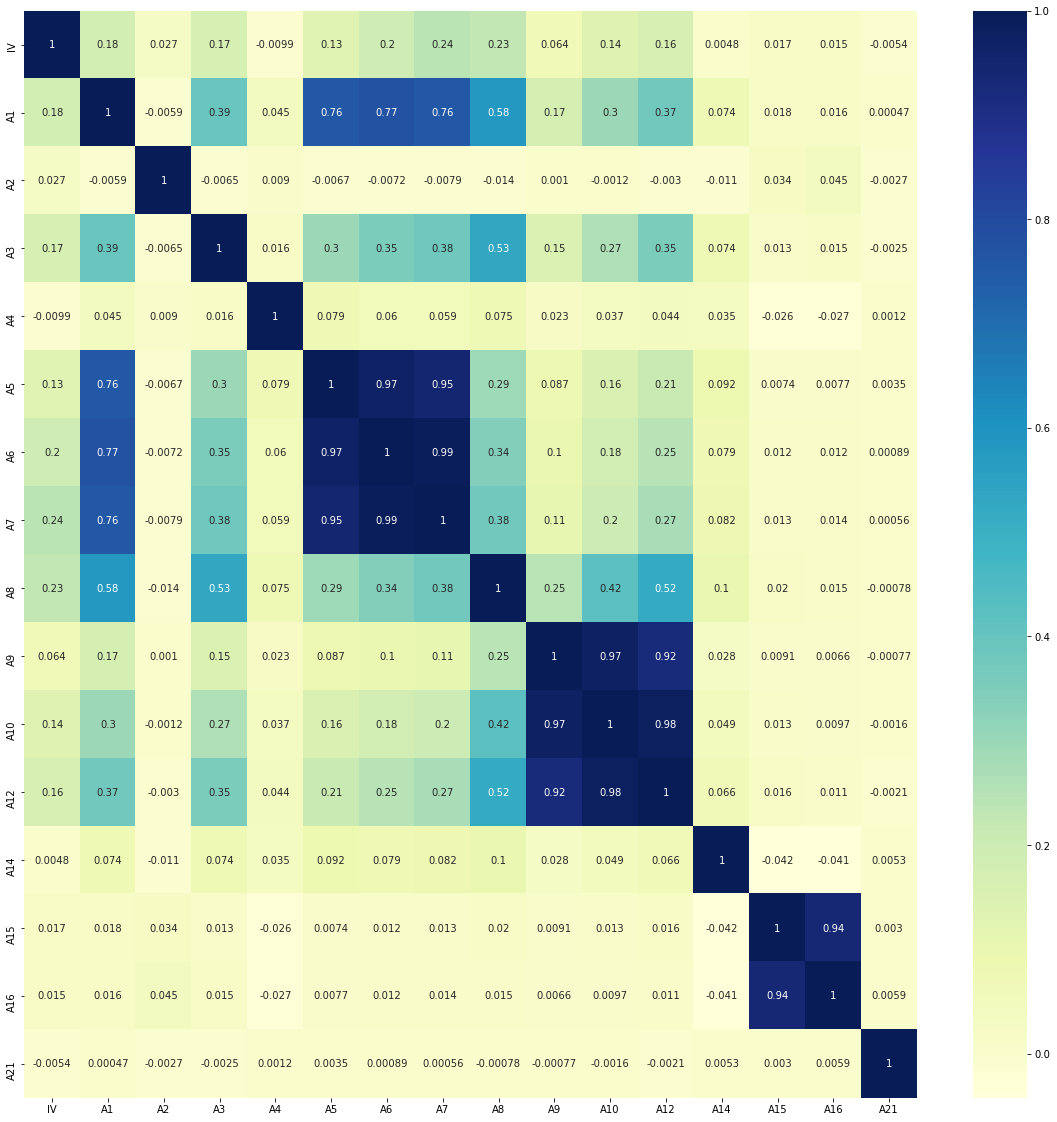

In [26]:
P5[num_cols].corr()
plt.figure(figsize = (20,20))
dataplot = sns.heatmap(P5[num_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

## 4.4.Univariate Analysis (Skewness and Kurtosis) Along with removal of Outliers

In [27]:
quantiles = P5[num_cols].quantile([0.25,0.5,0.75])
quantiles

IV   A1   A2   A3   A4    A5    A6    A7   A8    A9   A10   A12  A14  \
0.25   2.0  0.0  3.0  0.0  0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   
0.50   8.0  0.0  8.0  0.0  0.0   0.0   2.0   4.0  1.0   3.0   6.0   8.0  0.0   
0.75  40.0  4.0  8.0  0.0  0.0  18.0  33.0  48.0  6.0  19.0  37.0  54.0  0.0   

       A15   A16        A21  
0.25  0.68  0.68  17.024869  
0.50  0.83  0.82  17.049813  
0.75  0.96  0.94  17.074796

### Seperately checking Values of Skewness and Kurtosis for all the Above Numerical Variables Before and After removal of Outliers

## A1

The skewness A1 Column before removal of outliers is  64.56413327534979


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


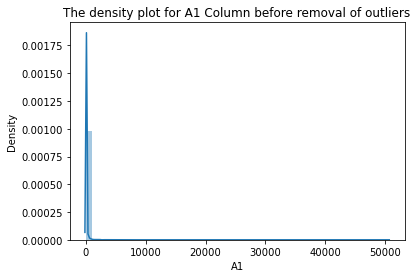

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


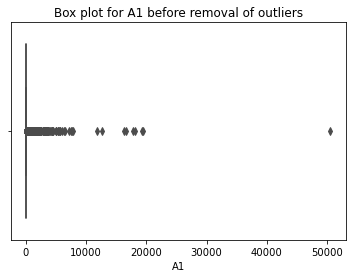

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A1 before removal pof outliers is  6289.300936140795
The skewness of A1 Column after removal of outliers is  3.252203543215891


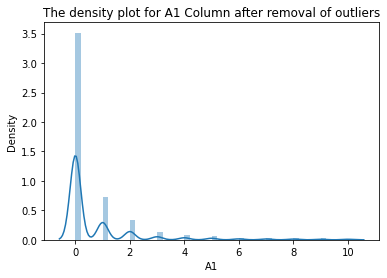

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


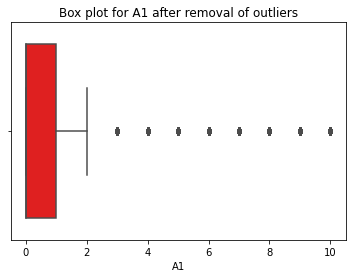

The kutosis value for A1 after removal pof outliers is  11.946593784097658


In [28]:
print("The skewness A1 Column before removal of outliers is ",P5['A1'].skew())
sns.distplot(P5['A1'])
plt.title("The density plot for A1 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A1'],color= "red")
plt.title("Box plot for A1 before removal of outliers")
plt.show()
print("The kutosis value for A1 before removal pof outliers is ", P5['A1'].kurt())

#Agin it is highly skewed so replacing the noise
quantiles = P5['A1'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A1']=np.where(P5['A1']> outliers, P5['A1'].median(),P5['A1'])

#Values for A1 column after removal of outliers
print("The skewness of A1 Column after removal of outliers is ",P5['A1'].skew())
sns.distplot(P5['A1'])
plt.title("The density plot for A1 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A1'],color= "red")
plt.title("Box plot for A1 after removal of outliers")
plt.show()
print("The kutosis value for A1 after removal pof outliers is ", P5['A1'].kurt())

## A2

The skewness A2 Column before removal of outliers is  4.836702485098198


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


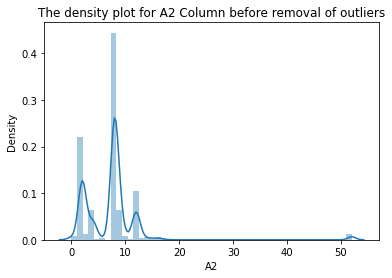

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


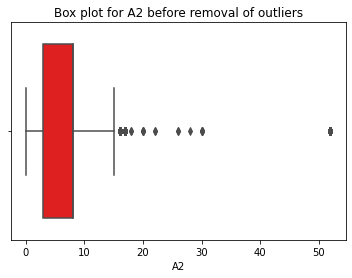

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A2 before removal pof outliers is  33.94711341190012
The skewness of A2 Column after removal of outliers is  -0.24130454447149977


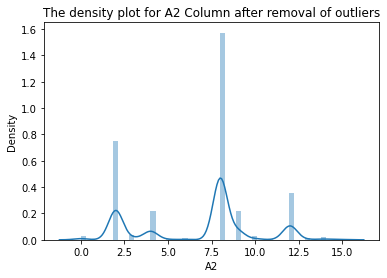

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


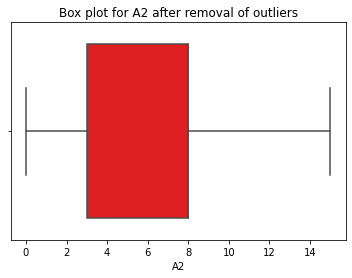

The kutosis value for A2 after removal pof outliers is  -0.8593103956636776


In [29]:
print("The skewness A2 Column before removal of outliers is ",P5['A2'].skew())
sns.distplot(P5['A2'])
plt.title("The density plot for A2 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A2'],color= "red")
plt.title("Box plot for A2 before removal of outliers")
plt.show()
print("The kutosis value for A2 before removal pof outliers is ", P5['A2'].kurt())


#Agin it is highly skewed so replacing the noise
quantiles = P5['A2'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A2']=np.where(P5['A2']> outliers, P5['A2'].median(),P5['A2'])

#Values for A1 column after removal of outliers
print("The skewness of A2 Column after removal of outliers is ",P5['A2'].skew())
sns.distplot(P5['A2'])
plt.title("The density plot for A2 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A2'],color= "red")
plt.title("Box plot for A2 after removal of outliers")
plt.show()
print("The kutosis value for A2 after removal pof outliers is ", P5['A2'].kurt())

## A3

The skewness A3 Column before removal of outliers is  56.78814980750081


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


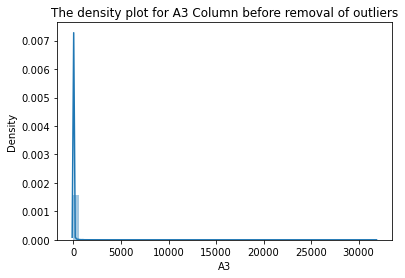

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


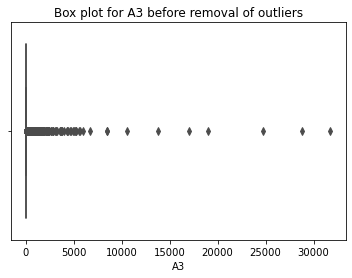

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


The kutosis value for A3 before removal pof outliers is  4104.981054804497
The skewness of A3 Column after removal of outliers is  0


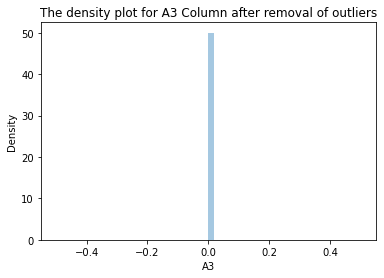

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


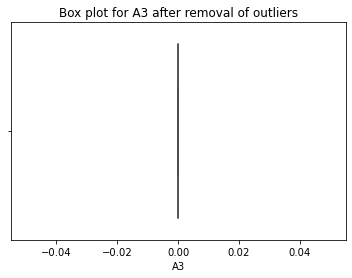

The kutosis value for A3 after removal pof outliers is  0


In [30]:
print("The skewness A3 Column before removal of outliers is ",P5['A3'].skew())
sns.distplot(P5['A3'])
plt.title("The density plot for A3 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A3'],color= "red")
plt.title("Box plot for A3 before removal of outliers")
plt.show()
print("The kutosis value for A3 before removal pof outliers is ", P5['A3'].kurt())


#Agin it is highly skewed so replacing the noise
quantiles = P5['A3'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A3']=np.where(P5['A3']> outliers, P5['A3'].median(),P5['A3'])

#Values for A1 column after removal of outliers
print("The skewness of A3 Column after removal of outliers is ",P5['A3'].skew())
sns.distplot(P5['A3'])
plt.title("The density plot for A3 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A3'],color= "red")
plt.title("Box plot for A3 after removal of outliers")
plt.show()
print("The kutosis value for A3 after removal pof outliers is ", P5['A3'].kurt())

## A4

The skewness A4 Column before removal of outliers is  53.727208250744496


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


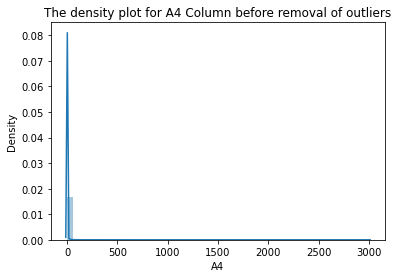

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


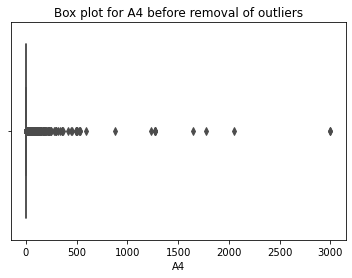

The kutosis value for A4 before removal pof outliers is  3614.326414756337
The skewness of A4 Column after removal of outliers is  0


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


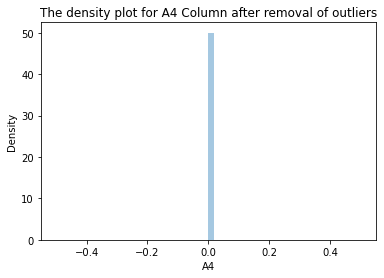

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


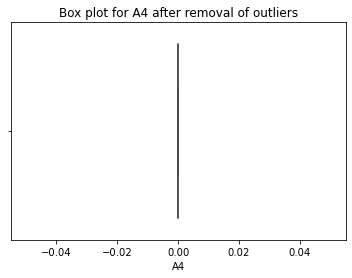

The kutosis value for A4 after removal pof outliers is  0


In [31]:
print("The skewness A4 Column before removal of outliers is ",P5['A4'].skew())
sns.distplot(P5['A4'])
plt.title("The density plot for A4 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A4'],color= "red")
plt.title("Box plot for A4 before removal of outliers")
plt.show()
print("The kutosis value for A4 before removal pof outliers is ", P5['A4'].kurt())


#Agin it is highly skewed so replacing the noise
quantiles = P5['A4'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A4']=np.where(P5['A4']> outliers, P5['A4'].median(),P5['A4'])

#Values for A1 column after removal of outliers
print("The skewness of A4 Column after removal of outliers is ",P5['A4'].skew())
sns.distplot(P5['A4'])
plt.title("The density plot for A4 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A4'],color= "red")
plt.title("Box plot for A4 after removal of outliers")
plt.show()
print("The kutosis value for A4 after removal pof outliers is ", P5['A4'].kurt())


## A5

The skewness A5 Column before removal of outliers is  66.28593074914069


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


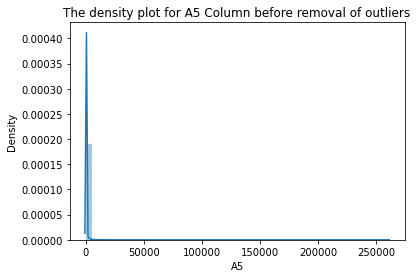

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


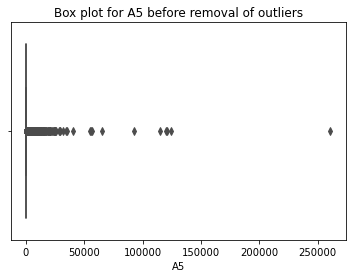

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A5 before removal pof outliers is  6070.973150723998
The skewness of A5 Column after removal of outliers is  2.5601417282287295


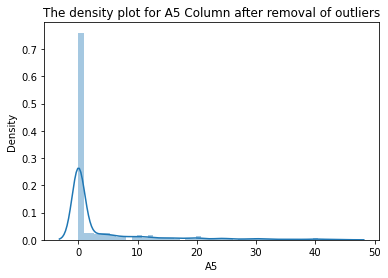

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


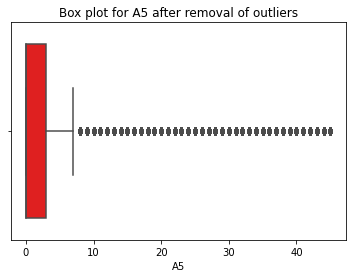

The kutosis value for A5 after removal pof outliers is  6.264127085909515


In [32]:
print("The skewness A5 Column before removal of outliers is ",P5['A5'].skew())
sns.distplot(P5['A5'])
plt.title("The density plot for A5 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A5'],color= "red")
plt.title("Box plot for A5 before removal of outliers")
plt.show()
print("The kutosis value for A5 before removal pof outliers is ", P5['A5'].kurt())


#Agin it is highly skewed so replacing the noise
quantiles = P5['A5'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A5']=np.where(P5['A5']> outliers, P5['A5'].median(),P5['A5'])

#Values for A1 column after removal of outliers
print("The skewness of A5 Column after removal of outliers is ",P5['A5'].skew())
sns.distplot(P5['A5'])
plt.title("The density plot for A5 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A5'],color= "red")
plt.title("Box plot for A5 after removal of outliers")
plt.show()
print("The kutosis value for A5 after removal pof outliers is ", P5['A5'].kurt())

## A6

The skewness A6 Column before removal of outliers is  60.69097698117965


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


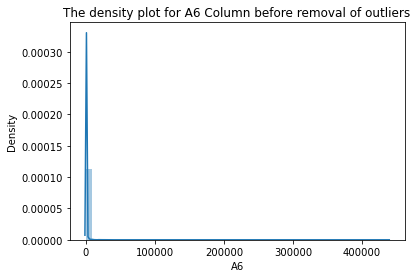

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


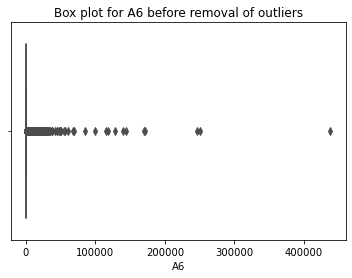

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A6 before removal pof outliers is  5086.585519078725
The skewness of A6 Column after removal of outliers is  2.545382427485706


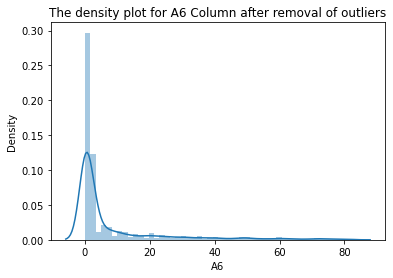

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


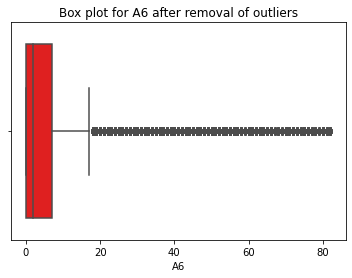

The kutosis value for A6 after removal pof outliers is  6.163047350793822


In [33]:

print("The skewness A6 Column before removal of outliers is ",P5['A6'].skew())
sns.distplot(P5['A6'])
plt.title("The density plot for A6 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A6'],color= "red")
plt.title("Box plot for A6 before removal of outliers")
plt.show()
print("The kutosis value for A6 before removal pof outliers is ", P5['A6'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A6'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A6']=np.where(P5['A6']> outliers, P5['A6'].median(),P5['A6'])

#Values for A1 column after removal of outliers
print("The skewness of A6 Column after removal of outliers is ",P5['A6'].skew())
sns.distplot(P5['A6'])
plt.title("The density plot for A6 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A6'],color= "red")
plt.title("Box plot for A6 after removal of outliers")
plt.show()
print("The kutosis value for A6 after removal pof outliers is ", P5['A6'].kurt())


## A7

The skewness A7 Column before removal of outliers is  53.86396159129838


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


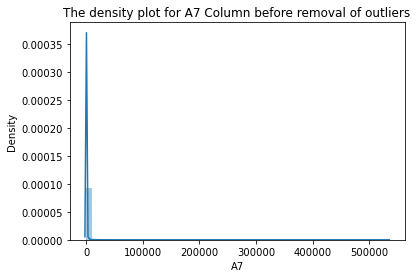

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


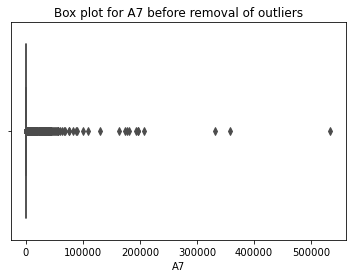

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A7 before removal pof outliers is  3983.8836787051087
The skewness of A7 Column after removal of outliers is  2.5727662612430118


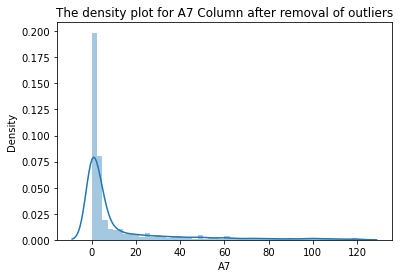

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


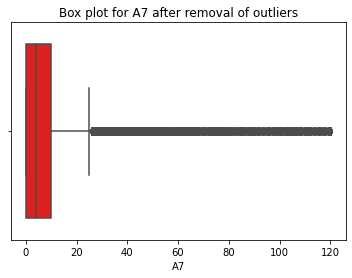

The kutosis value for A7 after removal pof outliers is  6.302001370514522


In [34]:
print("The skewness A7 Column before removal of outliers is ",P5['A7'].skew())
sns.distplot(P5['A7'])
plt.title("The density plot for A7 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A7'],color= "red")
plt.title("Box plot for A7 before removal of outliers")
plt.show()
print("The kutosis value for A7 before removal pof outliers is ", P5['A7'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A7'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A7']=np.where(P5['A7']> outliers, P5['A7'].median(),P5['A7'])

#Values for A1 column after removal of outliers
print("The skewness of A7 Column after removal of outliers is ",P5['A7'].skew())
sns.distplot(P5['A7'])
plt.title("The density plot for A7 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A7'],color= "red")
plt.title("Box plot for A7 after removal of outliers")
plt.show()
print("The kutosis value for A7 after removal pof outliers is ", P5['A7'].kurt())


## A8

The skewness A8 Column before removal of outliers is  34.21293290169843


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


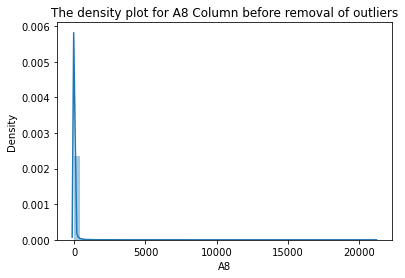

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


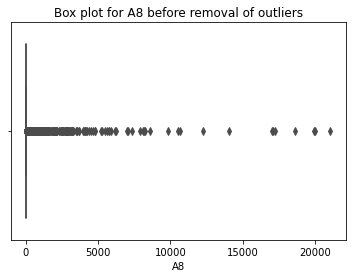

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A8 before removal pof outliers is  1503.8522913899274
The skewness of A8 Column after removal of outliers is  2.271616754863086


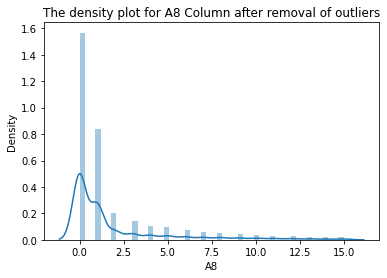

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


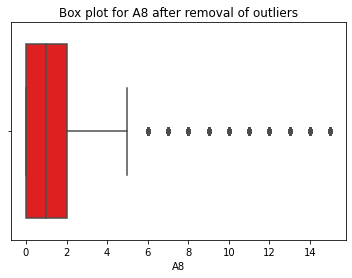

The kutosis value for A8 after removal pof outliers is  4.825453242505903


In [35]:
print("The skewness A8 Column before removal of outliers is ",P5['A8'].skew())
sns.distplot(P5['A8'])
plt.title("The density plot for A8 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A8'],color= "red")
plt.title("Box plot for A8 before removal of outliers")
plt.show()
print("The kutosis value for A8 before removal pof outliers is ", P5['A8'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A8'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A8']=np.where(P5['A8']> outliers, P5['A8'].median(),P5['A8'])

#Values for A1 column after removal of outliers
print("The skewness of A8 Column after removal of outliers is ",P5['A8'].skew())
sns.distplot(P5['A8'])
plt.title("The density plot for A8 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A8'],color= "red")
plt.title("Box plot for A8 after removal of outliers")
plt.show()
print("The kutosis value for A8 after removal pof outliers is ", P5['A8'].kurt())

## A9

The skewness A9 Column before removal of outliers is  167.14280482216225


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


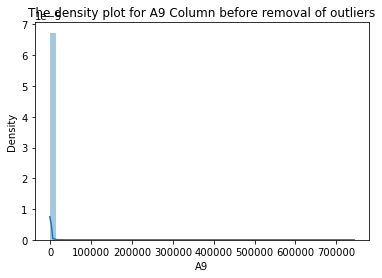

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


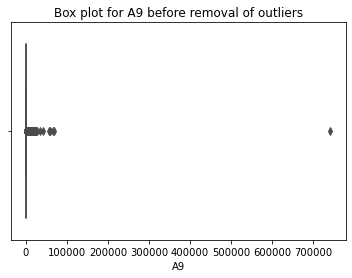

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A9 before removal pof outliers is  29766.46158932868
The skewness of A9 Column after removal of outliers is  2.3040493454746858


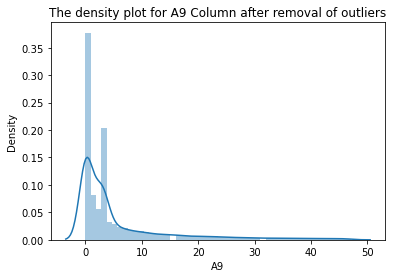

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


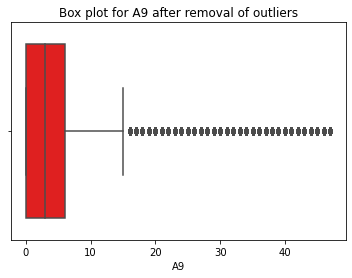

The kutosis value for A9 after removal pof outliers is  5.033344226273919


In [36]:
print("The skewness A9 Column before removal of outliers is ",P5['A9'].skew())
sns.distplot(P5['A9'])
plt.title("The density plot for A9 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A9'],color= "red")
plt.title("Box plot for A9 before removal of outliers")
plt.show()
print("The kutosis value for A9 before removal pof outliers is ", P5['A9'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A9'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A9']=np.where(P5['A9']> outliers, P5['A9'].median(),P5['A9'])

#Values for A1 column after removal of outliers
print("The skewness of A9 Column after removal of outliers is ",P5['A9'].skew())
sns.distplot(P5['A9'])
plt.title("The density plot for A9 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A9'],color= "red")
plt.title("Box plot for A9 after removal of outliers")
plt.show()
print("The kutosis value for A9 after removal pof outliers is ", P5['A9'].kurt())


## A10

The skewness A10 Column before removal of outliers is  132.0040573103515


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


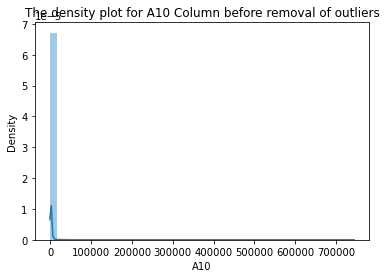

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A10 before removal pof outliers is  21152.312344985836
The skewness of A10 Column after removal of outliers is  2.34149121048242


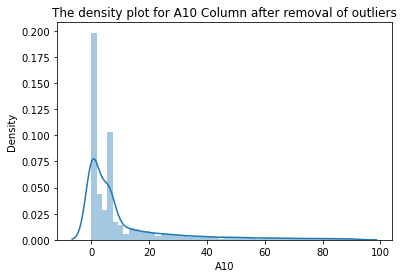

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The kutosis value for A10 after removal pof outliers is  5.246404986482399


In [37]:
print("The skewness A10 Column before removal of outliers is ",P5['A10'].skew())
sns.distplot(P5['A10'])
plt.title("The density plot for A10 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A10'],color= "red")
plt.title("Box plot for A10 before removal of outliers")
plt.show()
print("The kutosis value for A10 before removal pof outliers is ", P5['A10'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A10'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A10']=np.where(P5['A10']> outliers, P5['A10'].median(),P5['A10'])

#Values for A1 column after removal of outliers
print("The skewness of A10 Column after removal of outliers is ",P5['A10'].skew())
sns.distplot(P5['A10'])
plt.title("The density plot for A10 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A10'],color= "red")
plt.title("Box plot for A10 after removal of outliers")
plt.show()
print("The kutosis value for A10 after removal pof outliers is ", P5['A10'].kurt())


## A12

The skewness A12 Column before removal of outliers is  102.32609402994551


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A12 before removal pof outliers is  14344.762354155102
The skewness of A12 Column after removal of outliers is  2.3535003378405976


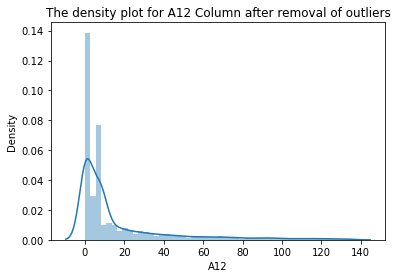

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


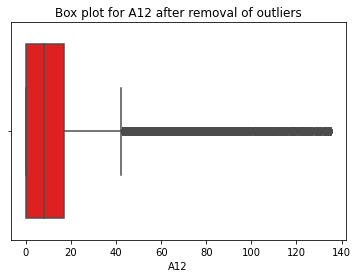

The kutosis value for A12 after removal pof outliers is  5.31738231212763


In [38]:
print("The skewness A12 Column before removal of outliers is ",P5['A12'].skew())
sns.distplot(P5['A12'])
plt.title("The density plot for A12 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A12'],color= "red")
plt.title("Box plot for A12 before removal of outliers")
plt.show()
print("The kutosis value for A12 before removal pof outliers is ", P5['A12'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A12'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A12']=np.where(P5['A12']> outliers, P5['A12'].median(),P5['A12'])

#Values for A1 column after removal of outliers
print("The skewness of A12 Column after removal of outliers is ",P5['A12'].skew())
sns.distplot(P5['A12'])
plt.title("The density plot for A12 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A12'],color= "red")
plt.title("Box plot for A12 after removal of outliers")
plt.show()
print("The kutosis value for A12 after removal pof outliers is ", P5['A12'].kurt())


## A14

The skewness A14 Column before removal of outliers is  31.5593047515094


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


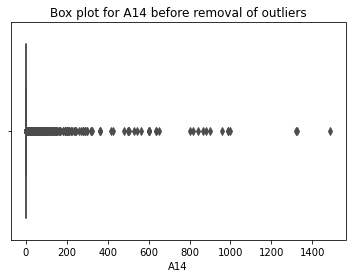

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


The kutosis value for A14 before removal pof outliers is  1245.6781668662356
The skewness of A14 Column after removal of outliers is  0


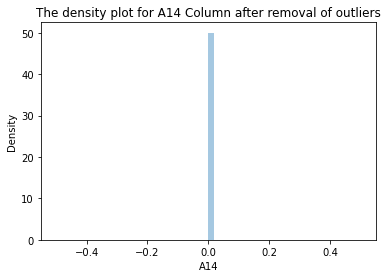

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


The kutosis value for A14 after removal pof outliers is  0


In [39]:
print("The skewness A14 Column before removal of outliers is ",P5['A14'].skew())
sns.distplot(P5['A14'])
plt.title("The density plot for A14 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A14'],color= "red")
plt.title("Box plot for A14 before removal of outliers")
plt.show()
print("The kutosis value for A14 before removal pof outliers is ", P5['A14'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A14'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.75] + 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A14']=np.where(P5['A14']> outliers, P5['A14'].median(),P5['A14'])

#Values for A1 column after removal of outliers
print("The skewness of A14 Column after removal of outliers is ",P5['A14'].skew())
sns.distplot(P5['A14'])
plt.title("The density plot for A14 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A14'],color= "red")
plt.title("Box plot for A14 after removal of outliers")
plt.show()
print("The kutosis value for A14 after removal pof outliers is ", P5['A14'].kurt())

## A15

The skewness A15 Column before removal of outliers is  -1.4980354141914893


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


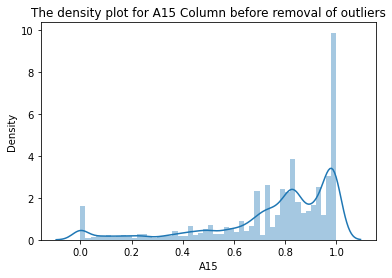

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A15 before removal pof outliers is  1.6821591496512083
The skewness of A15 Column after removal of outliers is  -1.0781654740743734


C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


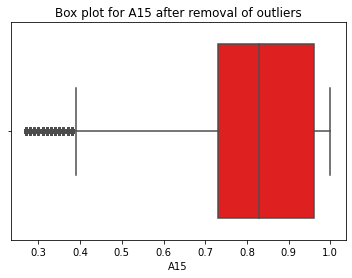

The kutosis value for A15 after removal pof outliers is  0.7426730980238232


In [40]:
print("The skewness A15 Column before removal of outliers is ",P5['A15'].skew())
sns.distplot(P5['A15'])
plt.title("The density plot for A15 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A15'],color= "red")
plt.title("Box plot for A15 before removal of outliers")
plt.show()
print("The kutosis value for A15 before removal pof outliers is ", P5['A15'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A15'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.25] - 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A15']=np.where(P5['A15']< outliers, P5['A15'].median(),P5['A15'])

#Values for A1 column after removal of outliers
print("The skewness of A15 Column after removal of outliers is ",P5['A15'].skew())
sns.distplot(P5['A15'])
plt.title("The density plot for A15 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A15'],color= "red")
plt.title("Box plot for A15 after removal of outliers")
plt.show()
print("The kutosis value for A15 after removal pof outliers is ", P5['A15'].kurt())

## A16

The skewness A16 Column before removal of outliers is  -1.4921041196043885


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


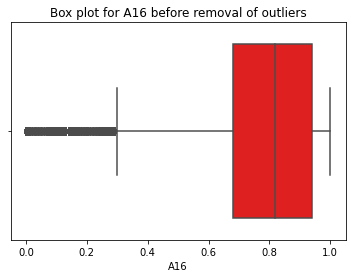

C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The kutosis value for A16 before removal pof outliers is  1.722931199017756
The skewness of A16 Column after removal of outliers is  -1.104024946166684


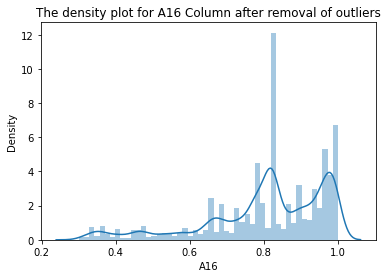

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


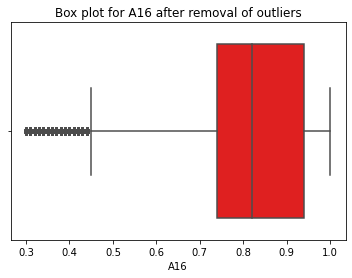

The kutosis value for A16 after removal pof outliers is  0.7816945558219444


In [41]:
print("The skewness A16 Column before removal of outliers is ",P5['A16'].skew())
sns.distplot(P5['A16'])
plt.title("The density plot for A16 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A16'],color= "red")
plt.title("Box plot for A16 before removal of outliers")
plt.show()
print("The kutosis value for A16 before removal pof outliers is ", P5['A16'].kurt())


#Again it is highly skewed so replacing the noise
quantiles = P5['A16'].quantile([0.25,0.5,0.75])
outliers = quantiles[0.25] - 1.5*(quantiles[0.75]-quantiles[0.25])
#replace the outlier by median value
P5['A16']=np.where(P5['A16']< outliers, P5['A16'].median(),P5['A16'])

#Values for A1 column after removal of outliers
print("The skewness of A16 Column after removal of outliers is ",P5['A16'].skew())
sns.distplot(P5['A16'])
plt.title("The density plot for A16 Column after removal of outliers")
plt.show()
sns.boxplot(P5['A16'],color= "red")
plt.title("Box plot for A16 after removal of outliers")
plt.show()
print("The kutosis value for A16 after removal pof outliers is ", P5['A16'].kurt())

## A21

The skewness A21 Column before removal of outliers is  0.0006206444485938996


C:\Users\91971\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


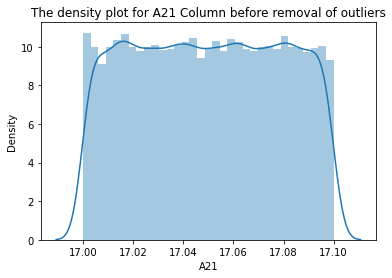

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


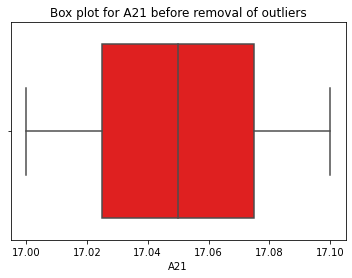

The kutosis value for A21 before removal pof outliers is  -1.1982803938297304


In [42]:
print("The skewness A21 Column before removal of outliers is ",P5['A21'].skew())
sns.distplot(P5['A21'])
plt.title("The density plot for A21 Column before removal of outliers")
plt.show()
sns.boxplot(P5['A21'],color= "red")
plt.title("Box plot for A21 before removal of outliers")
plt.show()
print("The kutosis value for A21 before removal pof outliers is ", P5['A21'].kurt())


#It is not skewed

In [44]:
#If the absolute value of skew<0.5 then very symmetric.
#If the absolute value of skew is in between 0.5 and 1 then slightly skewed
#If the absolute value of skew is greater than 1 then very skewed.

## 4.5.Bivariate Analysis (Pairplot)

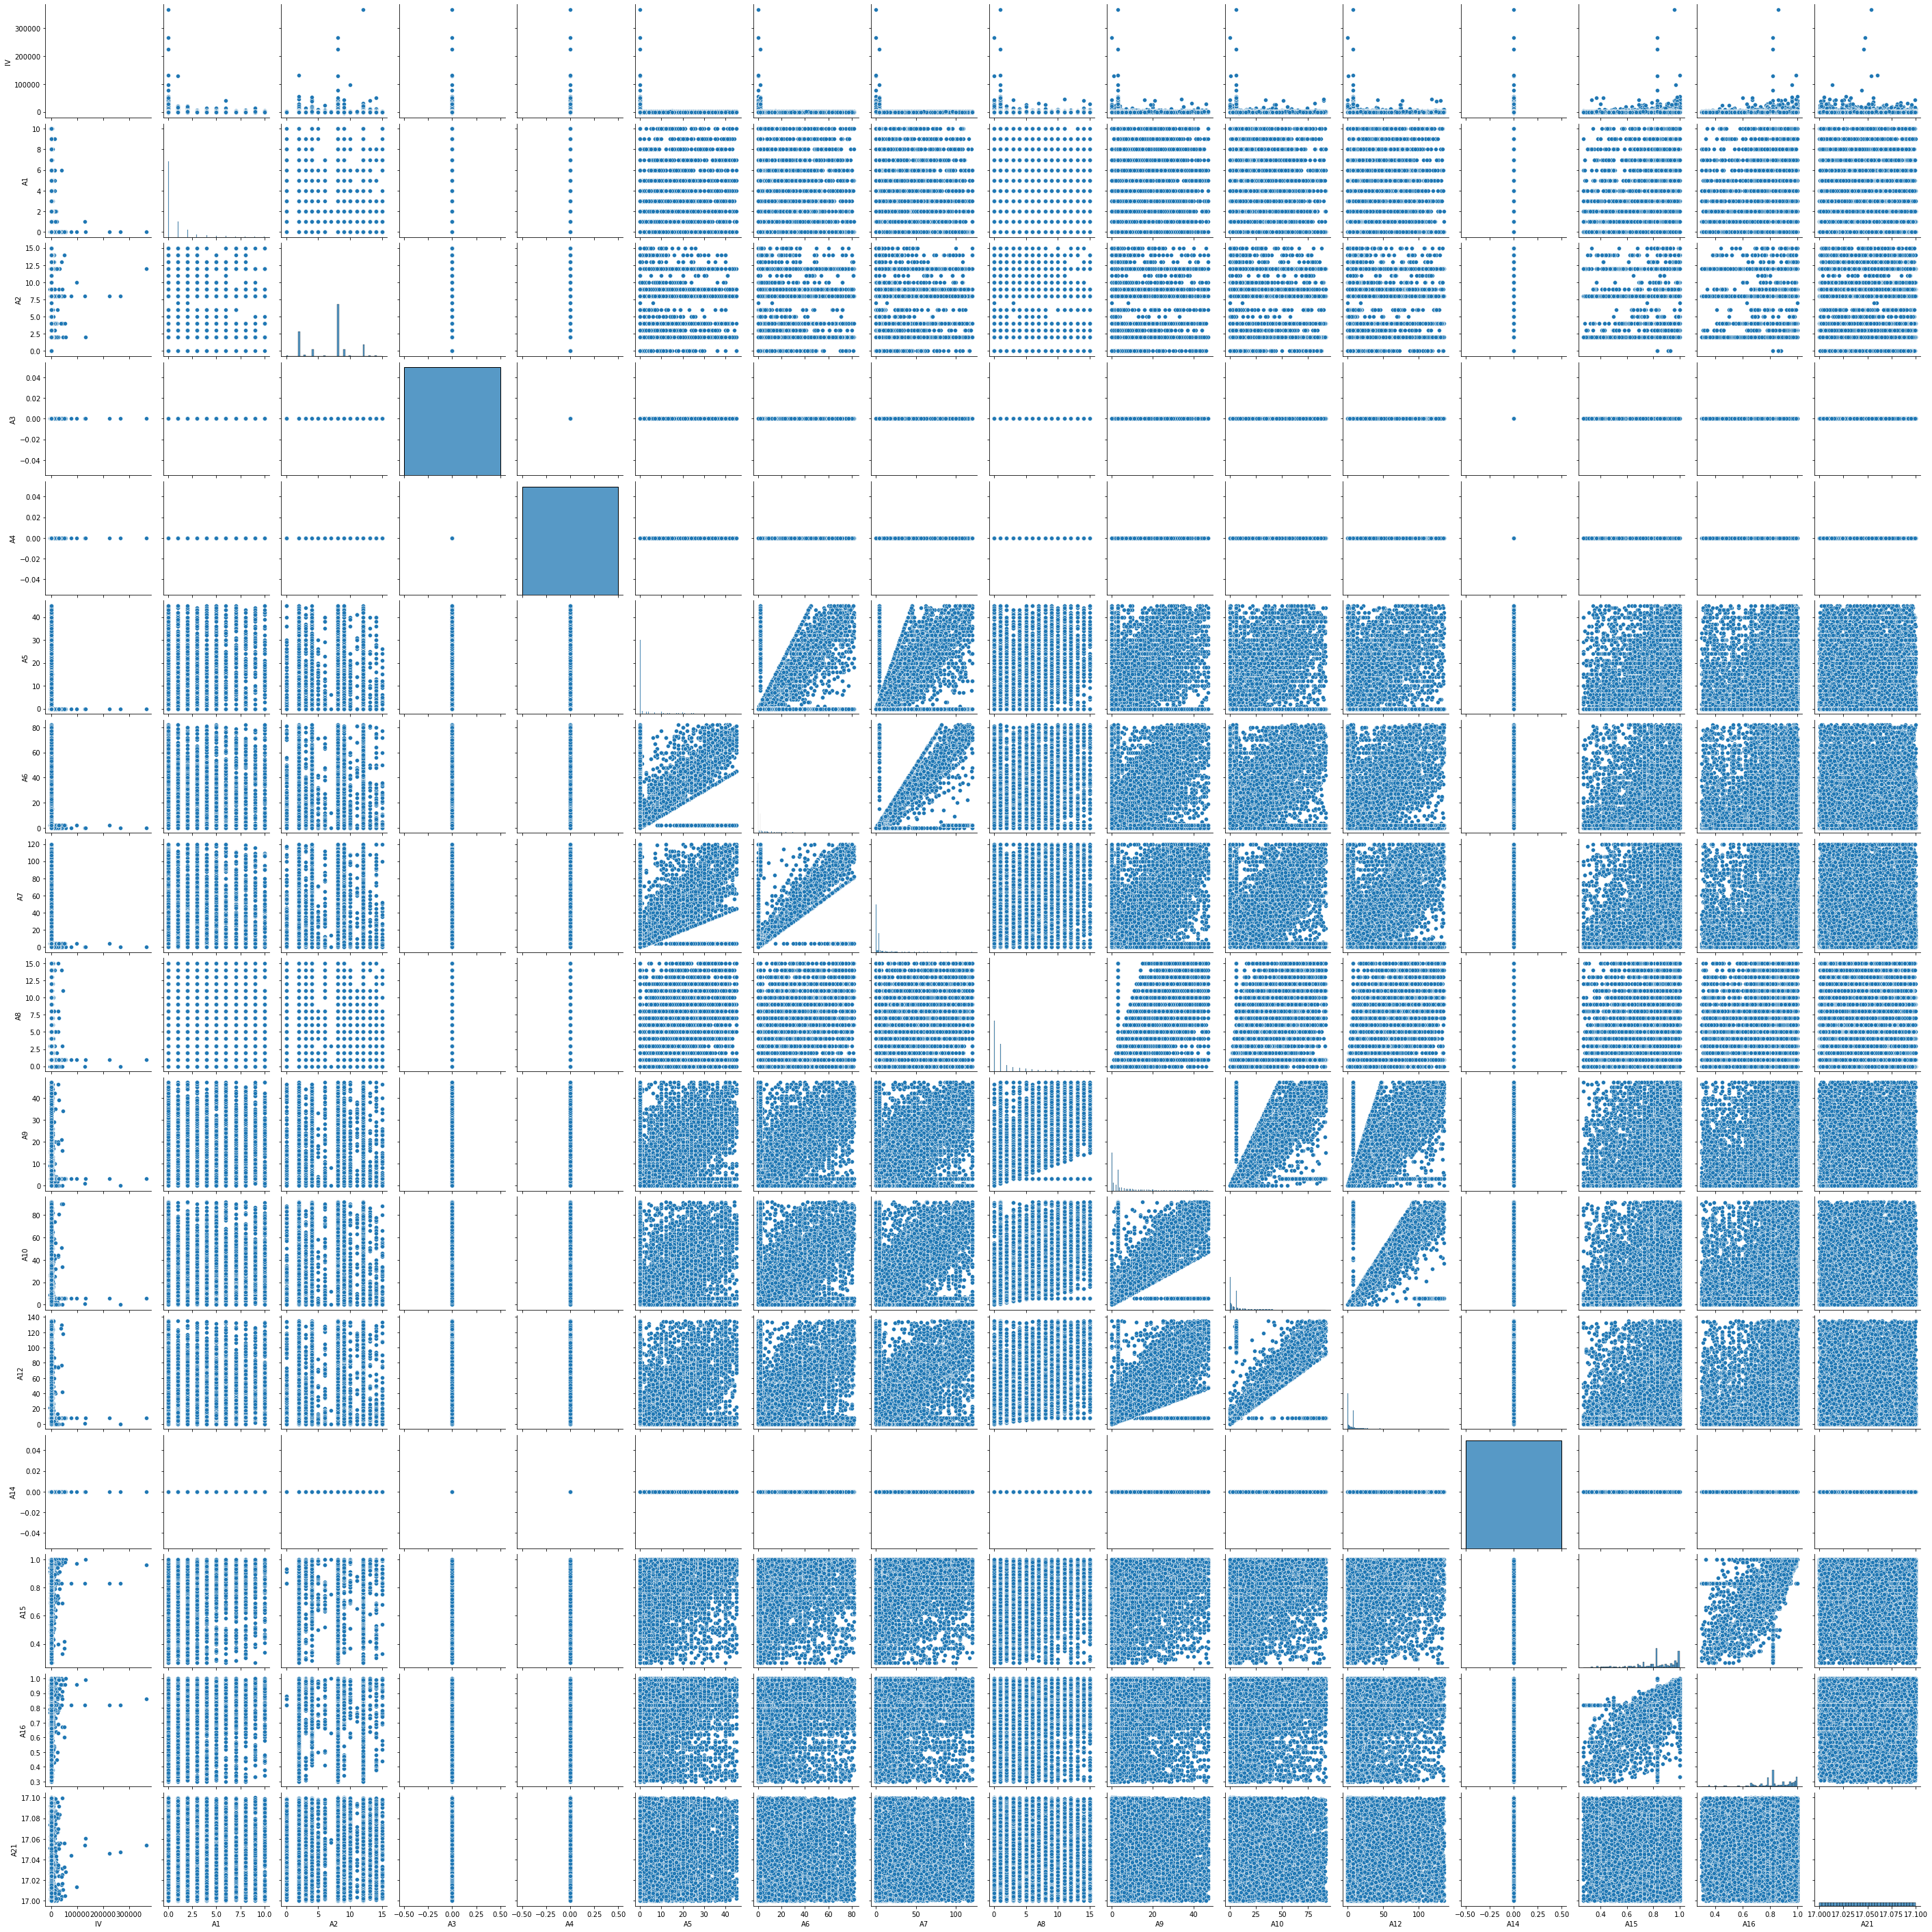

In [96]:
sns.pairplot(P5[num_cols], palette ='viridis',height = 2.5)
plt.show()

## 4.6.Categorical Data Analysis

In [43]:
cat_cols

['A13', 'A17', 'A18', 'A19', 'A20', 'A22']

## A13

In [45]:
#Analysis of Categorical Variables
sns.countplot(P5["A13"])
P5["A13"].value_counts()

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    34218
1       63
Name: A13, dtype: int64

## A17

In [46]:
sns.countplot(P5["A17"])
P5["A17"].value_counts()

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    27128
1     7153
Name: A17, dtype: int64

## A18

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    34270
1       11
Name: A18, dtype: int64

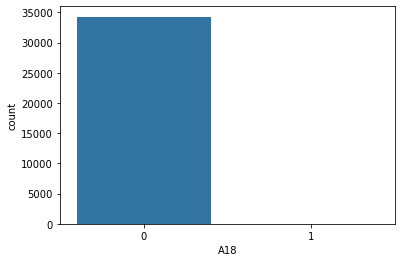

In [47]:
sns.countplot(P5["A18"])
P5["A18"].value_counts()

## A19

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    29758
1     4523
Name: A19, dtype: int64

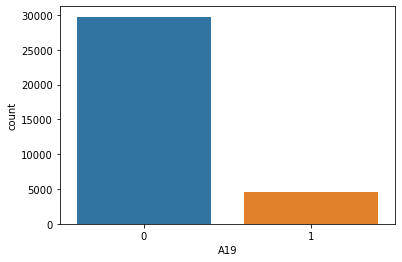

In [48]:
sns.countplot(P5["A19"])
P5["A19"].value_counts()

## A20

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    32991
0     1290
Name: A20, dtype: int64

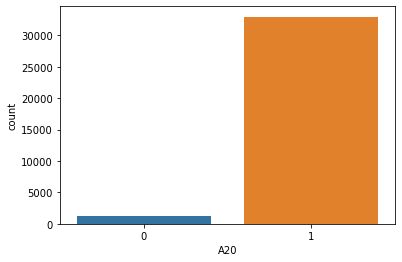

In [49]:
sns.countplot(P5["A20"])
P5["A20"].value_counts()

## A22

C:\Users\91971\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    34274
1        7
Name: A22, dtype: int64

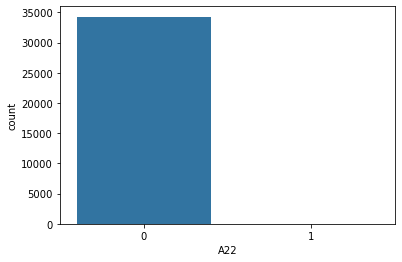

In [50]:
sns.countplot(P5["A22"])
P5["A22"].value_counts()

## 4.7.PCA

In [51]:
P5.columns

Index(['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21',
       'A22', 'Target'],
      dtype='object')

In [52]:
cat_cols

['A13', 'A17', 'A18', 'A19', 'A20', 'A22']

### Seperating Numerical and Categorical because Standard Scaling Can only be done on numerical data and after the standard scaling they are both combined to do the PCA.

In [53]:
x_num = P5.drop(['A13', 'A17', 'A18', 'A19', 'A20', 'A22','Target'], axis = 1)
x_cat = P5[['A13', 'A17', 'A18', 'A19', 'A20', 'A22']]
y = P5[['Target']] 

In [54]:
x_num.head()

IV   A1   A2   A3   A4   A5    A6    A7   A8    A9   A10   A12  A14  \
0  2049  0.0  8.0  0.0  0.0  0.0   0.0   0.0  1.0   3.0   6.0   8.0  0.0   
1    48  0.0  8.0  0.0  0.0  0.0   0.0   0.0  1.0   1.0   1.0   1.0  0.0   
2   318  2.0  9.0  0.0  0.0  0.0   0.0   0.0  0.0   1.0   2.0   2.0  0.0   
3    62  4.0  2.0  0.0  0.0  0.0  15.0  30.0  7.0  24.0  42.0  71.0  0.0   
4     2  0.0  8.0  0.0  0.0  0.0   0.0   1.0  0.0   0.0   2.0   2.0  0.0   

    A15   A16        A21  
0  0.52  0.69  17.078971  
1  0.59  0.78  17.022384  
2  0.94  0.79  17.024773  
3  0.51  0.47  17.074995  
4  0.82  0.81  17.072697

In [55]:
y.head()

Target
0       0
1       0
2       0
3       0
4       0

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
x_num_scale =  pd.DataFrame(sc.fit_transform(x_num)) 

In [58]:
x_num_scale

0         1         2    3    4         5         6         7   \
0      0.544937 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
1     -0.056591 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
2      0.024575  0.816736  0.664226  0.0  0.0 -0.471163 -0.512457 -0.521778   
3     -0.052383  2.083924 -1.441047  0.0  0.0 -0.471163  0.428137  0.750028   
4     -0.070419 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.479384   
...         ...       ...       ...  ...  ...       ...       ...       ...   
34276 -0.070720 -0.450452  0.964980  0.0  0.0  0.577475  0.365431  0.495667   
34277 -0.044567  0.816736 -0.839541  0.0  0.0 -0.471163 -0.512457 -0.521778   
34278 -0.070720  2.083924  0.363473  0.0  0.0 -0.471163 -0.512457 -0.097842   
34279 -0.069518 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.512457 -0.352203   
34280 -0.071021 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.387045 -0.352203   

             8         9         10        11   12        13        14  \
0     -0.269933 -0.300651 -0.291129 -0.315250  0.0 -1.816129 -0.696476   
1     -0.269933 -0.514108 -0.569498 -0.582966  0.0 -1.386445 -0.149743   
2     -0.595844 -0.514108 -0.513824 -0.544721  0.0  0.761973 -0.088995   
3      1.685531  1.940639  1.713126  2.094195  0.0 -1.877512 -2.032933   
4     -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.025373  0.032501   
...         ...       ...       ...       ...  ...       ...       ...   
34276 -0.595844  0.126261 -0.068434 -0.124024  0.0  0.455056  0.579234   
34277  1.033709  1.300270  0.376956  0.067202  0.0  0.086756  0.093249   
34278  0.055977  0.339717  0.209935  0.334918  0.0  1.068890  1.125967   
34279 -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.209523 -0.392735   
34280 -0.595844 -0.300651 -0.458150 -0.506476  0.0  0.393673 -0.878720   

             15  
0      1.011337  
1     -0.952252  
2     -0.869336  
3      0.873387  
4      0.793621  
...         ...  
34276  0.033989  
34277 -1.584701  
34278  0.653748  
34279  0.173536  
34280 -1.469269  

[34281 rows x 16 columns]

#### Adding the column names that disappeared due to scaling

In [60]:
x_num.columns

Index(['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'A12', 'A14', 'A15', 'A16', 'A21'],
      dtype='object')

In [61]:
x_num_scale.columns =['IV', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10','A12', 'A14', 'A15', 'A16', 'A21']

In [62]:
x_num_scale

IV        A1        A2   A3   A4        A5        A6        A7  \
0      0.544937 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
1     -0.056591 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
2      0.024575  0.816736  0.664226  0.0  0.0 -0.471163 -0.512457 -0.521778   
3     -0.052383  2.083924 -1.441047  0.0  0.0 -0.471163  0.428137  0.750028   
4     -0.070419 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.479384   
...         ...       ...       ...  ...  ...       ...       ...       ...   
34276 -0.070720 -0.450452  0.964980  0.0  0.0  0.577475  0.365431  0.495667   
34277 -0.044567  0.816736 -0.839541  0.0  0.0 -0.471163 -0.512457 -0.521778   
34278 -0.070720  2.083924  0.363473  0.0  0.0 -0.471163 -0.512457 -0.097842   
34279 -0.069518 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.512457 -0.352203   
34280 -0.071021 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.387045 -0.352203   

             A8        A9       A10       A12  A14       A15       A16  \
0     -0.269933 -0.300651 -0.291129 -0.315250  0.0 -1.816129 -0.696476   
1     -0.269933 -0.514108 -0.569498 -0.582966  0.0 -1.386445 -0.149743   
2     -0.595844 -0.514108 -0.513824 -0.544721  0.0  0.761973 -0.088995   
3      1.685531  1.940639  1.713126  2.094195  0.0 -1.877512 -2.032933   
4     -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.025373  0.032501   
...         ...       ...       ...       ...  ...       ...       ...   
34276 -0.595844  0.126261 -0.068434 -0.124024  0.0  0.455056  0.579234   
34277  1.033709  1.300270  0.376956  0.067202  0.0  0.086756  0.093249   
34278  0.055977  0.339717  0.209935  0.334918  0.0  1.068890  1.125967   
34279 -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.209523 -0.392735   
34280 -0.595844 -0.300651 -0.458150 -0.506476  0.0  0.393673 -0.878720   

            A21  
0      1.011337  
1     -0.952252  
2     -0.869336  
3      0.873387  
4      0.793621  
...         ...  
34276  0.033989  
34277 -1.584701  
34278  0.653748  
34279  0.173536  
34280 -1.469269  

[34281 rows x 16 columns]

In [63]:
x_num_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IV      34281 non-null  float64
 1   A1      34281 non-null  float64
 2   A2      34281 non-null  float64
 3   A3      34281 non-null  float64
 4   A4      34281 non-null  float64
 5   A5      34281 non-null  float64
 6   A6      34281 non-null  float64
 7   A7      34281 non-null  float64
 8   A8      34281 non-null  float64
 9   A9      34281 non-null  float64
 10  A10     34281 non-null  float64
 11  A12     34281 non-null  float64
 12  A14     34281 non-null  float64
 13  A15     34281 non-null  float64
 14  A16     34281 non-null  float64
 15  A21     34281 non-null  float64
dtypes: float64(16)
memory usage: 4.2 MB


In [64]:
x_combined=pd.concat([x_num_scale, x_cat.reindex(x_num_scale.index)], axis=1)


In [65]:
x_combined

IV        A1        A2   A3   A4        A5        A6        A7  \
0      0.544937 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
1     -0.056591 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   
2      0.024575  0.816736  0.664226  0.0  0.0 -0.471163 -0.512457 -0.521778   
3     -0.052383  2.083924 -1.441047  0.0  0.0 -0.471163  0.428137  0.750028   
4     -0.070419 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.479384   
...         ...       ...       ...  ...  ...       ...       ...       ...   
34276 -0.070720 -0.450452  0.964980  0.0  0.0  0.577475  0.365431  0.495667   
34277 -0.044567  0.816736 -0.839541  0.0  0.0 -0.471163 -0.512457 -0.521778   
34278 -0.070720  2.083924  0.363473  0.0  0.0 -0.471163 -0.512457 -0.097842   
34279 -0.069518 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.512457 -0.352203   
34280 -0.071021 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.387045 -0.352203   

             A8        A9       A10       A12  A14       A15       A16  \
0     -0.269933 -0.300651 -0.291129 -0.315250  0.0 -1.816129 -0.696476   
1     -0.269933 -0.514108 -0.569498 -0.582966  0.0 -1.386445 -0.149743   
2     -0.595844 -0.514108 -0.513824 -0.544721  0.0  0.761973 -0.088995   
3      1.685531  1.940639  1.713126  2.094195  0.0 -1.877512 -2.032933   
4     -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.025373  0.032501   
...         ...       ...       ...       ...  ...       ...       ...   
34276 -0.595844  0.126261 -0.068434 -0.124024  0.0  0.455056  0.579234   
34277  1.033709  1.300270  0.376956  0.067202  0.0  0.086756  0.093249   
34278  0.055977  0.339717  0.209935  0.334918  0.0  1.068890  1.125967   
34279 -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.209523 -0.392735   
34280 -0.595844 -0.300651 -0.458150 -0.506476  0.0  0.393673 -0.878720   

            A21  A13  A17  A18  A19  A20  A22  
0      1.011337    0    0    0    0    1    0  
1     -0.952252    0    1    0    0    1    0  
2     -0.869336    0    1    0    0    0    0  
3      0.873387    0    0    0    0    1    0  
4      0.793621    0    0    0    0    1    0  
...         ...  ...  ...  ...  ...  ...  ...  
34276  0.033989    0    0    0    0    1    0  
34277 -1.584701    0    1    0    0    1    0  
34278  0.653748    0    0    0    0    1    0  
34279  0.173536    0    0    0    0    1    0  
34280 -1.469269    0    0    0    1    1    0  

[34281 rows x 22 columns]

### Splitting data into test and train and then appling PCA to X train and X test 

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_combined,y,test_size=0.2,random_state=0)
#Four data sets that are x_train,x_test,y_train,y_test

In [70]:
x_train.head()

IV        A1        A2   A3   A4        A5        A6        A7  \
26548 -0.068616  0.183142 -1.441047  0.0  0.0 -0.471163  2.622858  1.597899   
7851   0.308955 -0.450452 -0.839541  0.0  0.0 -0.471163 -0.387045 -0.352203   
33060 -0.069518 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.449751 -0.436991   
34026 -0.072223 -0.450452  0.363473  0.0  0.0 -0.471163 -0.387045 -0.352203   
14252 -0.070119 -0.450452  0.664226  0.0  0.0  2.208690  1.494144  1.216357   

             A8        A9       A10       A12  A14       A15       A16  \
26548  2.011441  1.193542  1.323410  1.405782  0.0  1.068890  1.065219   
7851  -0.269933 -0.300651 -0.291129 -0.315250  0.0  0.946124  0.639982   
33060 -0.595844 -0.514108 -0.402476 -0.468231  0.0 -0.956762 -0.817972   
34026 -0.269933 -0.300651 -0.291129 -0.315250  0.0 -1.263679 -1.182460   
14252  0.707799  0.019533  0.042914  0.143692  0.0  0.761973  0.153998   

            A21  A13  A17  A18  A19  A20  A22  
26548 -1.259397    0    0    0    0    1    0  
7851  -0.208153    0    0    0    0    1    0  
33060  1.107642    0    0    0    0    1    0  
34026  0.806450    0    0    0    0    1    0  
14252 -1.032892    0    0    0    0    1    0

In [71]:
x_train.shape

(27424, 22)

In [72]:
x_test.head()

IV        A1        A2   A3   A4        A5        A6        A7  \
32970 -0.093567 -0.450452  0.363473  0.0  0.0 -0.471163 -0.387045 -0.352203   
33411 -0.071021 -0.450452  0.363473  0.0  0.0  0.111414  0.051899 -0.055449   
20169 -0.029837  4.618300  0.363473  0.0  0.0 -0.471163 -0.387045 -0.352203   
30169 -0.071922 -0.450452  0.363473  0.0  0.0 -0.471163 -0.387045 -0.352203   
24428 -0.068916 -0.450452 -1.140294  0.0  0.0 -0.471163 -0.198926 -0.309810   

             A8        A9       A10       A12  A14       A15       A16  \
32970 -0.269933 -0.300651 -0.291129 -0.315250  0.0  0.577823  0.761478   
33411  0.055977 -0.087195 -0.235455 -0.315250  0.0 -0.465694  0.214746   
20169  4.292816 -0.300651 -0.291129 -0.315250  0.0 -1.447829 -1.243208   
30169 -0.269933 -0.300651 -0.291129 -0.315250  0.0 -3.043797  0.093249   
24428  0.707799  0.019533 -0.179781 -0.124024  0.0  1.007507  1.065219   

            A21  A13  A17  A18  A19  A20  A22  
32970 -0.062021    0    0    0    1    1    0  
33411 -0.934750    0    0    0    0    1    0  
20169  1.540796    0    0    0    1    1    0  
30169  1.143673    0    0    0    0    1    0  
24428  1.155158    0    0    0    0    1    0

In [73]:
x_test.shape

(6857, 22)

In [74]:
y_train.shape

(27424, 1)

In [75]:
y_test.shape

(6857, 1)

In [76]:
#Using Pricipal Component Analysis 
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=8)

In [78]:
#x_train = x_train.reset_index(drop=True)
#x_train

In [79]:
pca.fit(x_train)

PCA(n_components=8)

In [80]:
xtrain_pca=pca.fit_transform(x_train)
xtrain_pca

array([[ 3.82307857e+00,  1.47783209e+00, -5.77449915e-01, ...,
        -1.40164334e+00,  2.50393716e-01, -2.18840947e-01],
       [-8.69697489e-01,  1.26607767e+00, -2.66333391e-01, ...,
        -7.49501213e-01,  8.19198039e-02, -7.70194448e-02],
       [-1.32705067e+00, -1.04832358e+00, -4.66913150e-01, ...,
        -1.07115396e+00,  5.44890071e-01, -2.79135951e-01],
       ...,
       [-9.93689822e-01, -4.74727013e-01,  6.91992499e-01, ...,
         1.02266248e+00, -1.06128377e+00, -1.05927055e-02],
       [-1.54263756e+00,  9.11028995e-01,  2.89704419e-01, ...,
         1.45109030e+00, -1.04310522e+00,  4.79192105e-04],
       [-1.55271201e+00,  1.43114771e-01, -2.61510415e-02, ...,
         1.65556455e-01, -3.94019744e-01, -3.34030074e-02]])

In [82]:
pca.explained_variance_ratio_
# tells how much of the variance is explained by the 8 components selected in x train. 

array([0.34250597, 0.1367816 , 0.09275836, 0.08419404, 0.07421345,
       0.07322995, 0.06586332, 0.03245491])

In [83]:
pca.fit(x_test)

PCA(n_components=8)

In [84]:
xtest_pca=pca.fit_transform(x_test)
xtest_pca

array([[-0.87259625, -0.97208419, -0.08912338, ..., -0.50325149,
         0.03145873, -0.12959207],
       [-0.27792192,  0.23204993,  0.20486087, ..., -0.69935027,
        -0.24863476, -0.03122675],
       [ 1.34689537,  1.79670393, -2.60070016, ...,  3.64283513,
        -3.96464823,  0.4277189 ],
       ...,
       [-1.22128684,  1.53719322,  0.92857908, ...,  0.64637148,
         0.06495447, -0.03332649],
       [-0.83617526, -1.4794502 , -0.01215864, ..., -0.6178135 ,
         0.03759335, -0.05746981],
       [-1.58045818,  0.36380104, -0.1013022 , ..., -0.09562063,
         0.05624225, -0.05299757]])

In [85]:
pca.explained_variance_ratio_
# tells how much of the variance is explained by the 8 components selected in x test. 

array([0.36006354, 0.14597511, 0.09862969, 0.07930257, 0.0780611 ,
       0.07095413, 0.03445713, 0.0322799 ])

In [89]:
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))

False
True


In [90]:
xtest_pca = pd.DataFrame(xtest_pca)

In [91]:
xtrain_pca = pd.DataFrame(xtrain_pca)

In [92]:
xtrain_pca.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

# 5.Model Building

### All models are applied on three forms of data that are: 
### 1. Normal Data 
### 2. Data that has been Scaled and PCA is applied
### 3. Upsampled Data

In [88]:
# MODEL BUILDING 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 5.1 Upsampling (Balancing)

In [93]:
# upsampled data 
y["Target"].value_counts()

0    22988
1    11293
Name: Target, dtype: int64

In [94]:
df=pd.concat([x_train, y_train.reindex(x_train.index)], axis=1)

In [95]:
df

IV        A1        A2   A3   A4        A5        A6        A7  \
26548 -0.068616  0.183142 -1.441047  0.0  0.0 -0.471163  2.622858  1.597899   
7851   0.308955 -0.450452 -0.839541  0.0  0.0 -0.471163 -0.387045 -0.352203   
33060 -0.069518 -0.450452 -1.441047  0.0  0.0 -0.471163 -0.449751 -0.436991   
34026 -0.072223 -0.450452  0.363473  0.0  0.0 -0.471163 -0.387045 -0.352203   
14252 -0.070119 -0.450452  0.664226  0.0  0.0  2.208690  1.494144  1.216357   
...         ...       ...       ...  ...  ...       ...       ...       ...   
20757 -0.068014 -0.450452 -1.140294  0.0  0.0 -0.471163 -0.512457 -0.267416   
32103 -0.069818 -0.450452  1.566486  0.0  0.0  0.227929 -0.010807 -0.013055   
30403 -0.070419 -0.450452  1.566486  0.0  0.0 -0.471163 -0.387045 -0.352203   
21243 -0.064407 -0.450452  1.566486  0.0  0.0 -0.471163 -0.512457 -0.521778   
2732  -0.040358 -0.450452  0.363473  0.0  0.0 -0.471163 -0.512457 -0.521778   

             A8        A9       A10       A12  A14       A15       A16  \
26548  2.011441  1.193542  1.323410  1.405782  0.0  1.068890  1.065219   
7851  -0.269933 -0.300651 -0.291129 -0.315250  0.0  0.946124  0.639982   
33060 -0.595844 -0.514108 -0.402476 -0.468231  0.0 -0.956762 -0.817972   
34026 -0.269933 -0.300651 -0.291129 -0.315250  0.0 -1.263679 -1.182460   
14252  0.707799  0.019533  0.042914  0.143692  0.0  0.761973  0.153998   
...         ...       ...       ...       ...  ...       ...       ...   
20757 -0.595844 -0.620836 -0.513824 -0.544721  0.0  0.700590 -0.149743   
32103  1.359620  0.339717  0.154261  0.143692  0.0 -0.956762 -0.817972   
30403 -0.269933 -0.300651 -0.291129 -0.315250  0.0 -0.527078 -0.088995   
21243 -0.595844 -0.620836 -0.625171 -0.621211  0.0  0.516440  0.882975   
2732  -0.595844 -0.620836 -0.625171 -0.621211  0.0  0.086756  0.093249   

            A21  A13  A17  A18  A19  A20  A22  Target  
26548 -1.259397    0    0    0    0    1    0       1  
7851  -0.208153    0    0    0    0    1    0       0  
33060  1.107642    0    0    0    0    1    0       1  
34026  0.806450    0    0    0    0    1    0       1  
14252 -1.032892    0    0    0    0    1    0       0  
...         ...  ...  ...  ...  ...  ...  ...     ...  
20757  0.897887    0    0    0    0    1    0       0  
32103 -0.162544    0    0    0    0    1    0       1  
30403  0.553346    0    0    0    0    1    0       1  
21243  1.029283    0    0    0    0    1    0       0  
2732  -0.150330    0    0    0    1    1    0       0  

[27424 rows x 23 columns]

In [101]:
dfmaj = df[df['Target'] == 0]
dfmin = df[df['Target'] == 1]

In [102]:
from sklearn.utils import resample,shuffle

In [103]:
dfmin1 = resample(dfmin, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(dfmaj),    # to match majority class
                                 random_state=1234) # reproducible results

In [104]:
dfmin1

IV   A1        A2        A3        A4        A5        A6  \
24534 -0.052683  0.0 -0.896784 -0.062710 -0.019212  0.255949  0.240219   
30770 -0.072824  0.0  0.101867 -0.046019  0.118928 -0.055390 -0.057416   
23800 -0.071922  0.0  0.767635 -0.062710  0.036044  0.011891  0.008506   
33115 -0.069217  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.061598   
25057 -0.069518  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.063812   
...         ...  ...       ...       ...       ...       ...       ...   
28479 -0.071021  0.0 -0.896784 -0.062710 -0.046840 -0.064624 -0.065779   
23864 -0.065309  0.0 -0.896784 -0.062710 -0.046840 -0.048354 -0.052005   
23721 -0.070419  0.0  0.268309 -0.062710 -0.046840 -0.063305 -0.065533   
26127 -0.070720  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   
32676 -0.061401  0.0  0.101867 -0.062710 -0.046840 -0.024608 -0.032080   

             A7        A8        A9       A10       A12       A14       A15  \
24534  0.274457  0.208863 -0.003841 -0.026419 -0.044779  3.000915 -0.354782   
30770 -0.060057 -0.059806 -0.026001 -0.044745 -0.058963 -0.066908  0.316515   
23800  0.011034 -0.001284 -0.008899 -0.020236 -0.028198  0.086484 -2.171234   
33115 -0.065384 -0.073107 -0.028650 -0.046953 -0.060362 -0.066908  0.000611   
25057 -0.067221 -0.081087 -0.028409 -0.046512 -0.060761 -0.066908  0.237539   
...         ...       ...       ...       ...       ...       ...       ...   
28479 -0.069977 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908 -1.341985   
23864 -0.059690 -0.078427 -0.030095 -0.049161 -0.065356 -0.066908 -2.092258   
23721 -0.069058 -0.089067 -0.029854 -0.048499 -0.063158 -0.066908  0.908837   
26127 -0.070895 -0.094388 -0.030336 -0.050266 -0.065756 -0.066908  0.553444   
32676 -0.033053 -0.027885 -0.012994 -0.023107 -0.033792  0.546657  0.316515   

            A16       A21  A13  A17  A18  A19  A20  A22  Target  
24534 -0.264118 -1.222968    0    0    0    0    1    0       1  
30770 -0.304922 -0.736388    0    0    0    0    1    0       1  
23800 -2.018673  0.579252    0    0    0    0    1    0       1  
33115  0.103114  0.905367    0    0    0    0    1    0       1  
25057  0.347936  0.911785    0    0    0    0    1    0       1  
...         ...       ...  ...  ...  ...  ...  ...  ...     ...  
28479 -1.610637  0.440587    0    1    0    0    1    0       1  
23864 -2.141084 -0.404522    0    1    0    0    1    0       1  
23721  0.919186 -1.267580    0    0    0    0    1    0       1  
26127  0.551954 -0.558623    0    0    0    0    1    0       1  
32676  0.062311 -0.292544    0    0    0    0    1    0       1  

[18444 rows x 23 columns]

In [105]:
dfupsampled = pd.concat([dfmin1, dfmaj])

In [106]:
dfupsampled

IV   A1        A2        A3        A4        A5        A6  \
24534 -0.052683  0.0 -0.896784 -0.062710 -0.019212  0.255949  0.240219   
30770 -0.072824  0.0  0.101867 -0.046019  0.118928 -0.055390 -0.057416   
23800 -0.071922  0.0  0.767635 -0.062710  0.036044  0.011891  0.008506   
33115 -0.069217  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.061598   
25057 -0.069518  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.063812   
...         ...  ...       ...       ...       ...       ...       ...   
15430  0.235004  0.0  0.101867  0.001271 -0.046840 -0.066823 -0.067501   
14935 -0.051781  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   
20757 -0.068014  0.0 -0.730342 -0.062710 -0.046840 -0.066823 -0.067501   
21243 -0.064407  0.0  0.767635 -0.062710 -0.046840 -0.066823 -0.067501   
2732  -0.040358  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   

             A7        A8        A9       A10       A12       A14       A15  \
24534  0.274457  0.208863 -0.003841 -0.026419 -0.044779  3.000915 -0.354782   
30770 -0.060057 -0.059806 -0.026001 -0.044745 -0.058963 -0.066908  0.316515   
23800  0.011034 -0.001284 -0.008899 -0.020236 -0.028198  0.086484 -2.171234   
33115 -0.065384 -0.073107 -0.028650 -0.046953 -0.060362 -0.066908  0.000611   
25057 -0.067221 -0.081087 -0.028409 -0.046512 -0.060761 -0.066908  0.237539   
...         ...       ...       ...       ...       ...       ...       ...   
15430 -0.071263  0.174282  0.009406  0.024366  0.044918 -0.066908  0.948325   
14935 -0.071263 -0.086407 -0.030818 -0.050045 -0.064956 -0.066908  0.908837   
20757 -0.070160 -0.097048 -0.032022 -0.051811 -0.067753 -0.066908  0.671908   
21243 -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908  0.553444   
2732  -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908 -2.447651   

            A16       A21  A13  A17  A18  A19  A20  A22  Target  
24534 -0.264118 -1.222968    0    0    0    0    1    0       1  
30770 -0.304922 -0.736388    0    0    0    0    1    0       1  
23800 -2.018673  0.579252    0    0    0    0    1    0       1  
33115  0.103114  0.905367    0    0    0    0    1    0       1  
25057  0.347936  0.911785    0    0    0    0    1    0       1  
...         ...       ...  ...  ...  ...  ...  ...  ...     ...  
15430  1.000793 -1.074498    0    0    0    0    1    0       0  
14935  0.878383  0.603374    0    0    0    0    1    0       0  
20757  0.103114  0.897887    0    0    0    0    1    0       0  
21243  0.796775  1.029283    0    0    0    0    1    0       0  
2732  -2.508317 -0.150330    0    0    0    1    1    0       0  

[36888 rows x 23 columns]

In [107]:
dfupsampled["Target"].value_counts()

1    18444
0    18444
Name: Target, dtype: int64

In [108]:
dfupsampled

IV   A1        A2        A3        A4        A5        A6  \
24534 -0.052683  0.0 -0.896784 -0.062710 -0.019212  0.255949  0.240219   
30770 -0.072824  0.0  0.101867 -0.046019  0.118928 -0.055390 -0.057416   
23800 -0.071922  0.0  0.767635 -0.062710  0.036044  0.011891  0.008506   
33115 -0.069217  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.061598   
25057 -0.069518  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.063812   
...         ...  ...       ...       ...       ...       ...       ...   
15430  0.235004  0.0  0.101867  0.001271 -0.046840 -0.066823 -0.067501   
14935 -0.051781  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   
20757 -0.068014  0.0 -0.730342 -0.062710 -0.046840 -0.066823 -0.067501   
21243 -0.064407  0.0  0.767635 -0.062710 -0.046840 -0.066823 -0.067501   
2732  -0.040358  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   

             A7        A8        A9       A10       A12       A14       A15  \
24534  0.274457  0.208863 -0.003841 -0.026419 -0.044779  3.000915 -0.354782   
30770 -0.060057 -0.059806 -0.026001 -0.044745 -0.058963 -0.066908  0.316515   
23800  0.011034 -0.001284 -0.008899 -0.020236 -0.028198  0.086484 -2.171234   
33115 -0.065384 -0.073107 -0.028650 -0.046953 -0.060362 -0.066908  0.000611   
25057 -0.067221 -0.081087 -0.028409 -0.046512 -0.060761 -0.066908  0.237539   
...         ...       ...       ...       ...       ...       ...       ...   
15430 -0.071263  0.174282  0.009406  0.024366  0.044918 -0.066908  0.948325   
14935 -0.071263 -0.086407 -0.030818 -0.050045 -0.064956 -0.066908  0.908837   
20757 -0.070160 -0.097048 -0.032022 -0.051811 -0.067753 -0.066908  0.671908   
21243 -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908  0.553444   
2732  -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908 -2.447651   

            A16       A21  A13  A17  A18  A19  A20  A22  Target  
24534 -0.264118 -1.222968    0    0    0    0    1    0       1  
30770 -0.304922 -0.736388    0    0    0    0    1    0       1  
23800 -2.018673  0.579252    0    0    0    0    1    0       1  
33115  0.103114  0.905367    0    0    0    0    1    0       1  
25057  0.347936  0.911785    0    0    0    0    1    0       1  
...         ...       ...  ...  ...  ...  ...  ...  ...     ...  
15430  1.000793 -1.074498    0    0    0    0    1    0       0  
14935  0.878383  0.603374    0    0    0    0    1    0       0  
20757  0.103114  0.897887    0    0    0    0    1    0       0  
21243  0.796775  1.029283    0    0    0    0    1    0       0  
2732  -2.508317 -0.150330    0    0    0    1    1    0       0  

[36888 rows x 23 columns]

In [109]:
x_train_up = dfupsampled.drop(columns = ['Target'])

In [110]:
x_train_up

IV   A1        A2        A3        A4        A5        A6  \
24534 -0.052683  0.0 -0.896784 -0.062710 -0.019212  0.255949  0.240219   
30770 -0.072824  0.0  0.101867 -0.046019  0.118928 -0.055390 -0.057416   
23800 -0.071922  0.0  0.767635 -0.062710  0.036044  0.011891  0.008506   
33115 -0.069217  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.061598   
25057 -0.069518  0.0  0.101867 -0.062710 -0.046840 -0.063305 -0.063812   
...         ...  ...       ...       ...       ...       ...       ...   
15430  0.235004  0.0  0.101867  0.001271 -0.046840 -0.066823 -0.067501   
14935 -0.051781  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   
20757 -0.068014  0.0 -0.730342 -0.062710 -0.046840 -0.066823 -0.067501   
21243 -0.064407  0.0  0.767635 -0.062710 -0.046840 -0.066823 -0.067501   
2732  -0.040358  0.0  0.101867 -0.062710 -0.046840 -0.066823 -0.067501   

             A7        A8        A9       A10       A12       A14       A15  \
24534  0.274457  0.208863 -0.003841 -0.026419 -0.044779  3.000915 -0.354782   
30770 -0.060057 -0.059806 -0.026001 -0.044745 -0.058963 -0.066908  0.316515   
23800  0.011034 -0.001284 -0.008899 -0.020236 -0.028198  0.086484 -2.171234   
33115 -0.065384 -0.073107 -0.028650 -0.046953 -0.060362 -0.066908  0.000611   
25057 -0.067221 -0.081087 -0.028409 -0.046512 -0.060761 -0.066908  0.237539   
...         ...       ...       ...       ...       ...       ...       ...   
15430 -0.071263  0.174282  0.009406  0.024366  0.044918 -0.066908  0.948325   
14935 -0.071263 -0.086407 -0.030818 -0.050045 -0.064956 -0.066908  0.908837   
20757 -0.070160 -0.097048 -0.032022 -0.051811 -0.067753 -0.066908  0.671908   
21243 -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908  0.553444   
2732  -0.071263 -0.097048 -0.032022 -0.052253 -0.068153 -0.066908 -2.447651   

            A16       A21  A13  A17  A18  A19  A20  A22  
24534 -0.264118 -1.222968    0    0    0    0    1    0  
30770 -0.304922 -0.736388    0    0    0    0    1    0  
23800 -2.018673  0.579252    0    0    0    0    1    0  
33115  0.103114  0.905367    0    0    0    0    1    0  
25057  0.347936  0.911785    0    0    0    0    1    0  
...         ...       ...  ...  ...  ...  ...  ...  ...  
15430  1.000793 -1.074498    0    0    0    0    1    0  
14935  0.878383  0.603374    0    0    0    0    1    0  
20757  0.103114  0.897887    0    0    0    0    1    0  
21243  0.796775  1.029283    0    0    0    0    1    0  
2732  -2.508317 -0.150330    0    0    0    1    1    0  

[36888 rows x 22 columns]

In [111]:
y_train_up = dfupsampled['Target']

In [112]:
y_train_up

24534    1
30770    1
23800    1
33115    1
25057    1
        ..
15430    0
14935    0
20757    0
21243    0
2732     0
Name: Target, Length: 36888, dtype: int64

In [113]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix #scorer

# 5.2. Naive Bayes (Gaussian)

In [106]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=nb.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.3727577657867872
              precision    recall  f1-score   support

     class_0       0.94      0.06      0.11      4544
     class_1       0.35      0.99      0.52      2313

    accuracy                           0.37      6857
   macro avg       0.64      0.52      0.31      6857
weighted avg       0.74      0.37      0.25      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [112]:
print (confusion_matrix(y_true=y_test, y_pred=nb.predict(x_test)))

[[ 260 4284]
 [  18 2295]]


In [107]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, nb.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

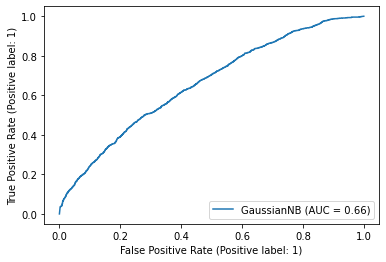

In [115]:
from sklearn import metrics
metrics.plot_roc_curve(nb, x_test, y_test)  
plt.show()  

In [108]:
# with pca
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(xtrain_pca,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=nb.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.5890331048563512
              precision    recall  f1-score   support

     class_0       0.65      0.81      0.72      4544
     class_1       0.29      0.15      0.20      2313

    accuracy                           0.59      6857
   macro avg       0.47      0.48      0.46      6857
weighted avg       0.53      0.59      0.55      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [109]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, nb.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

In [110]:
from sklearn import metrics
metrics.plot_roc_curve(nb, xtest_pca, y_test)  
plt.show()  

In [111]:
# with upsampling of minority class
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train_up,y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=nb.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.37188274755724077
              precision    recall  f1-score   support

     class_0       0.93      0.06      0.11      4544
     class_1       0.35      0.99      0.52      2313

    accuracy                           0.37      6857
   macro avg       0.64      0.52      0.31      6857
weighted avg       0.74      0.37      0.24      6857



<AxesSubplot:>

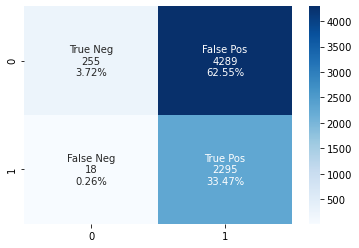

In [112]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,nb.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [113]:
from sklearn import metrics
metrics.plot_roc_curve(nb, x_test, y_test)  
plt.show()  

# 5.3. Naive Bayes (Beurnoulli)


In [114]:
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=nb.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.7147440571678577
              precision    recall  f1-score   support

     class_0       0.72      0.94      0.81      4544
     class_1       0.71      0.26      0.38      2313

    accuracy                           0.71      6857
   macro avg       0.71      0.60      0.60      6857
weighted avg       0.71      0.71      0.67      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

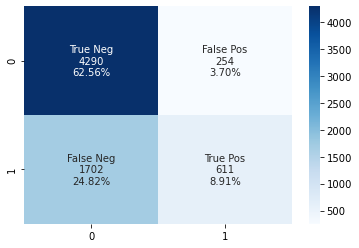

In [115]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, nb.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

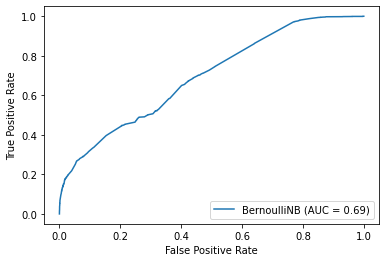

In [116]:
from sklearn import metrics
metrics.plot_roc_curve(nb, x_test, y_test)  
plt.show()  

In [120]:
# with pca
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(xtrain_pca,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=nb.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.5957415779495406
              precision    recall  f1-score   support

     class_0       0.66      0.81      0.73      4544
     class_1       0.32      0.17      0.22      2313

    accuracy                           0.60      6857
   macro avg       0.49      0.49      0.47      6857
weighted avg       0.54      0.60      0.56      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [121]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, nb.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<AxesSubplot:>

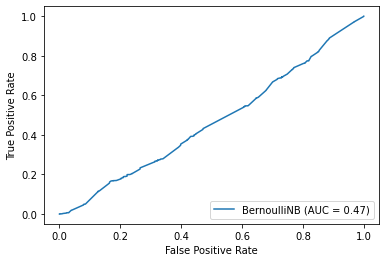

In [119]:
from sklearn import metrics
metrics.plot_roc_curve(nb, xtest_pca, y_test)  
plt.show()  

In [122]:
# with upsampling of minority class
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
nb.fit(x_train_up,y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=nb.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=nb.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.6269505614700306
              precision    recall  f1-score   support

     class_0       0.74      0.68      0.71      4544
     class_1       0.45      0.52      0.48      2313

    accuracy                           0.63      6857
   macro avg       0.59      0.60      0.60      6857
weighted avg       0.64      0.63      0.63      6857



<AxesSubplot:>

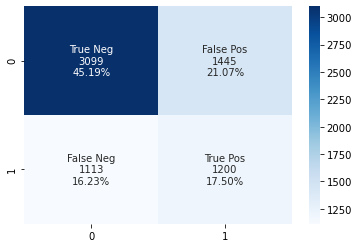

In [123]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, nb.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [124]:
from sklearn import metrics
metrics.plot_roc_curve(nb, x_test, y_test)  
plt.show()

# 5.4. Logistic Regression 

In [125]:
# normal
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object First
lr = LogisticRegression()
lr.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=lr.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=lr.predict(x_test), target_names=['class_0','class_1']))


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of classifier is : 0.7001604200087502
              precision    recall  f1-score   support

     class_0       0.70      0.97      0.81      4544
     class_1       0.74      0.17      0.28      2313

    accuracy                           0.70      6857
   macro avg       0.72      0.57      0.54      6857
weighted avg       0.71      0.70      0.63      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [126]:
lr.coef_

array([[-1.24778490e+01,  0.00000000e+00, -4.35784315e-01,
        -2.42177780e+00,  9.06074994e-01,  1.29089074e-01,
        -1.26050428e+00,  1.29123695e+00,  1.56057703e-01,
        -1.78461450e+00, -7.63514556e-01,  2.97740981e+00,
         1.51378667e-01, -1.71193029e-01, -8.64171477e-02,
         8.26383609e-03,  1.25744289e+00, -5.87839374e-01,
         6.53210170e-01,  2.19283747e-01, -2.99793386e-01,
        -6.30637622e-01]])

In [127]:
df_coef = pd.DataFrame(columns = ['ColumnName', 'Coefficient_value'])
df_coef['ColumnName'] = x_train.columns
df_coef['Coefficient_value'] = lr.coef_[0]
df_coef

ColumnName  Coefficient_value
0          IV         -12.477849
1          A1           0.000000
2          A2          -0.435784
3          A3          -2.421778
4          A4           0.906075
5          A5           0.129089
6          A6          -1.260504
7          A7           1.291237
8          A8           0.156058
9          A9          -1.784615
10        A10          -0.763515
11        A12           2.977410
12        A14           0.151379
13        A15          -0.171193
14        A16          -0.086417
15        A21           0.008264
16        A13           1.257443
17        A17          -0.587839
18        A18           0.653210
19        A19           0.219284
20        A20          -0.299793
21        A22          -0.630638

<AxesSubplot:>

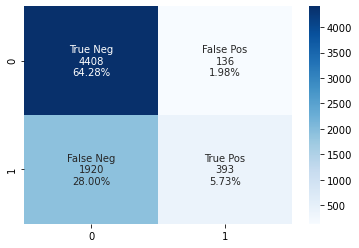

In [128]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,lr.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

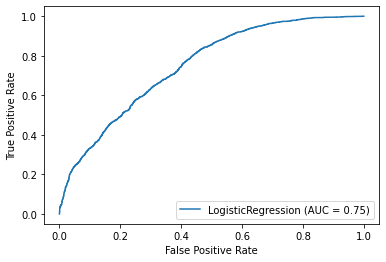

In [129]:
from sklearn import metrics
metrics.plot_roc_curve(lr, x_test, y_test)  
plt.show()

In [130]:
# pca
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object First
lr = LogisticRegression()
lr.fit(xtrain_pca,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=lr.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=lr.predict(xtest_pca), target_names=['class_0','class_1']))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of classifier is : 0.5323027563074231
              precision    recall  f1-score   support

     class_0       0.66      0.61      0.63      4544
     class_1       0.33      0.38      0.35      2313

    accuracy                           0.53      6857
   macro avg       0.50      0.49      0.49      6857
weighted avg       0.55      0.53      0.54      6857



In [131]:
lr.coef_

array([[-0.44977913,  0.15415291,  0.35735176,  0.73696959, -2.21248244,
         1.04930317, -0.12533149,  0.3876358 ]])

In [132]:
df_coef = pd.DataFrame(columns = ['ColumnName', 'Coefficient_value'])
df_coef['ColumnName'] = xtrain_pca.columns
df_coef['Coefficient_value'] = lr.coef_[0]
df_coef

ColumnName  Coefficient_value
0           0          -0.449779
1           1           0.154153
2           2           0.357352
3           3           0.736970
4           4          -2.212482
5           5           1.049303
6           6          -0.125331
7           7           0.387636

<AxesSubplot:>

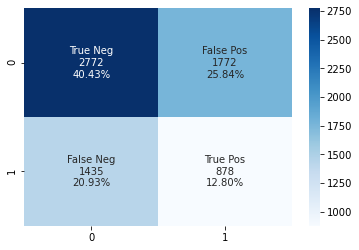

In [133]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,lr.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

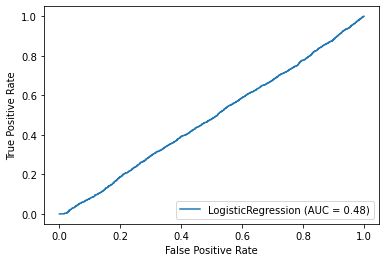

In [134]:
from sklearn import metrics
metrics.plot_roc_curve(lr, xtest_pca, y_test)  
plt.show()

In [135]:
# upsampling
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Object First
lr = LogisticRegression()
lr.fit(x_train_up,y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=lr.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=lr.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.6695347819746245
              precision    recall  f1-score   support

     class_0       0.80      0.66      0.73      4544
     class_1       0.51      0.68      0.58      2313

    accuracy                           0.67      6857
   macro avg       0.66      0.67      0.65      6857
weighted avg       0.70      0.67      0.68      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

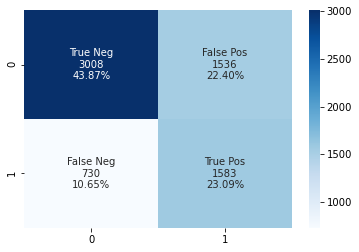

In [136]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,lr.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

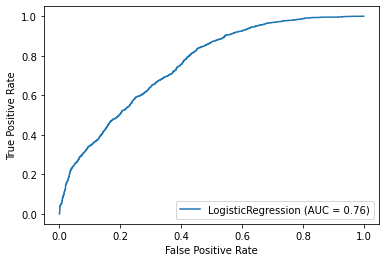

In [137]:
from sklearn import metrics
metrics.plot_roc_curve(lr, x_test, y_test)  
plt.show()

# 5.5. Support Vector Machine 

In [138]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
# normal 
model = SVC()
model.fit(x_train, y_train)
  
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.70      0.97      0.81      4544
           1       0.75      0.17      0.28      2313

    accuracy                           0.70      6857
   macro avg       0.72      0.57      0.54      6857
weighted avg       0.71      0.70      0.63      6857



In [249]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total=  25.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=  25.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.1s remaining:    0.0s
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.684, total=  25.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.681, total=  27.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total=  24.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=  26.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.697, total=  26.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=  24.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.692, total=  26.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=  22.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.679, total=  22.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.677, total=  24.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.679, total=  24.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.677, total=  25.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.679, total=  24.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.713, total=  33.4s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.712, total=  30.3s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.718, total=  28.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.716, total=  28.2s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.714, total=  31.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.711, total=  22.8s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.712, total=  24.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.712, total=  25.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.709, total=  25.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.709, total=  25.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=  26.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.689, total=  27.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=  26.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.689, total=  26.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.691, total=  27.7s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.731, total=  54.2s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.729, total=  50.8s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.730, total=  53.9s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.731, total=  45.9s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.730, total=  47.5s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.735, total=  23.6s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.734, total=  24.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.733, total=  23.8s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.730, total=  24.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.737, total=  26.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.708, total=  26.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.707, total=  25.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.706, total=  24.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.707, total=  23.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.707, total=  22.6s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 21.4min finished
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [252]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [253]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=0.1)


In [254]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      4544
           1       0.74      0.29      0.42      2313

    accuracy                           0.73      6857
   macro avg       0.73      0.62      0.62      6857
weighted avg       0.73      0.73      0.68      6857



<AxesSubplot:>

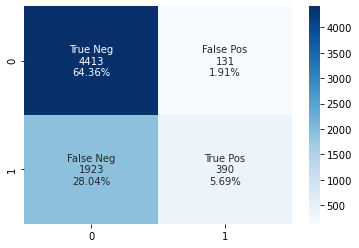

In [140]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,model.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [142]:
from sklearn import metrics
metrics.plot_roc_curve(model, x_test, y_test)  
plt.show()

In [143]:
# pca
model = SVC(C=10,gamma=0.1)
model.fit(xtrain_pca, y_train)
  
# print prediction results
predictions = model.predict(xtest_pca)
print(classification_report(y_test, predictions))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.65      0.56      0.60      4544
           1       0.32      0.40      0.36      2313

    accuracy                           0.51      6857
   macro avg       0.48      0.48      0.48      6857
weighted avg       0.54      0.51      0.52      6857



<AxesSubplot:>

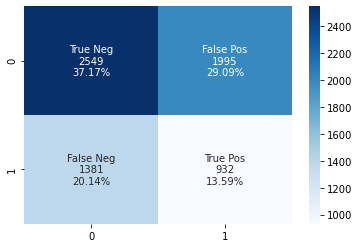

In [144]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,model.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [145]:
from sklearn import metrics
metrics.plot_roc_curve(model, xtest_pca, y_test)  
plt.show()

In [146]:
# upsampled
model = SVC(C=10,gamma=0.1)
model.fit(x_train_up, y_train_up)
  
# print prediction results
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.66      0.75      4544
           1       0.55      0.83      0.66      2313

    accuracy                           0.71      6857
   macro avg       0.72      0.74      0.71      6857
weighted avg       0.77      0.71      0.72      6857



<AxesSubplot:>

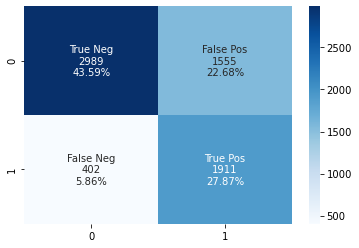

In [147]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,model.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

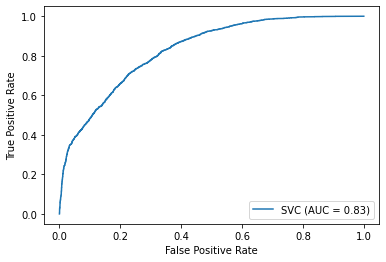

In [148]:
from sklearn import metrics
metrics.plot_roc_curve(model, x_test, y_test)  
plt.show()

# 5.6. Quadratic Discriminant Analysis

In [149]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [150]:
# NORMAL
qda= QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=qda.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=qda.predict(x_test), target_names=['class_0','class_1']))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of classifier is : 0.33731952749015603
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00      4544
     class_1       0.34      1.00      0.50      2313

    accuracy                           0.34      6857
   macro avg       0.17      0.50      0.25      6857
weighted avg       0.11      0.34      0.17      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in lo

C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


<AxesSubplot:>

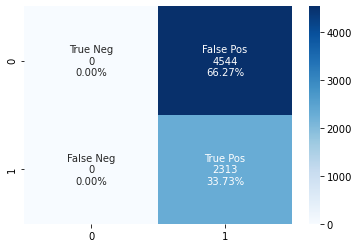

In [151]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,qda.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [153]:
# pca
qda= QuadraticDiscriminantAnalysis()
qda.fit(xtrain_pca, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=qda.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=qda.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.6253463613825287
              precision    recall  f1-score   support

     class_0       0.66      0.90      0.76      4544
     class_1       0.30      0.08      0.13      2313

    accuracy                           0.63      6857
   macro avg       0.48      0.49      0.44      6857
weighted avg       0.54      0.63      0.55      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

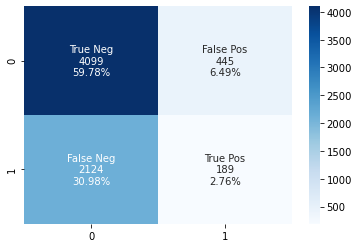

In [154]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,qda.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [155]:
# upsampled
qda= QuadraticDiscriminantAnalysis()
qda.fit(x_train_up, y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=qda.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=qda.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.33731952749015603
              precision    recall  f1-score   support

     class_0       0.00      0.00      0.00      4544
     class_1       0.34      1.00      0.50      2313

    accuracy                           0.34      6857
   macro avg       0.17      0.50      0.25      6857
weighted avg       0.11      0.34      0.17      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 

C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\user\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


<AxesSubplot:>

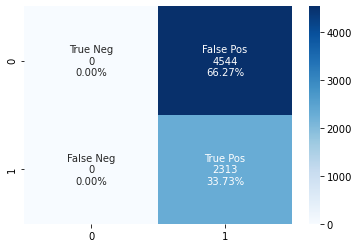

In [156]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,qda.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# 5.7. K Nearest Neighbors

In [157]:
# NORMAL
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=knn.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=knn.predict(x_test), target_names=['class_0','class_1']))

<ipython-input-157-bd36cc8a5a31>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train, y_train)


Accuracy of classifier is : 0.6968061834621555
              precision    recall  f1-score   support

     class_0       0.71      0.91      0.80      4544
     class_1       0.61      0.28      0.38      2313

    accuracy                           0.70      6857
   macro avg       0.66      0.59      0.59      6857
weighted avg       0.68      0.70      0.66      6857



<ipython-input-158-64f5e1b77a5f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(x_train, y_train)
<ipython-input-158-64f5e1b77a5f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(x_train, y_train)
<ipython-input-158-64f5e1b77a5f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(x_train, y_train)
<ipython-input-158-64f5e1b77a5f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn2.fit(x_train, y_train)
<ipython-input-158-64f5e1b77a5f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected

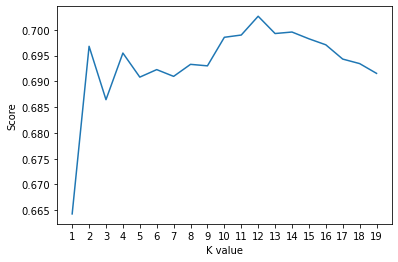

In [158]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100



In [159]:
acc

70.26396383257985

<AxesSubplot:>

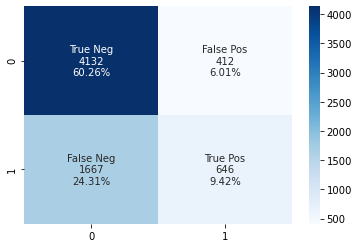

In [160]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,knn.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

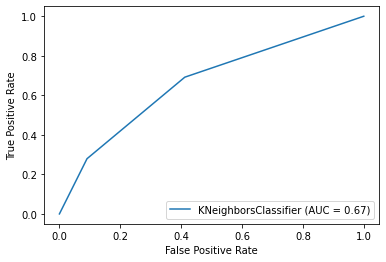

In [161]:
from sklearn import metrics
metrics.plot_roc_curve(knn, x_test, y_test)  
plt.show()

In [162]:
# pca
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)  # n_neighbors means k
knn.fit(xtrain_pca, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=knn.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=knn.predict(xtest_pca), target_names=['class_0','class_1']))

<ipython-input-162-8cd00baafd04>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(xtrain_pca, y_train)


Accuracy of classifier is : 0.4898643721744203
              precision    recall  f1-score   support

     class_0       0.64      0.52      0.58      4544
     class_1       0.31      0.43      0.36      2313

    accuracy                           0.49      6857
   macro avg       0.48      0.47      0.47      6857
weighted avg       0.53      0.49      0.50      6857



<AxesSubplot:>

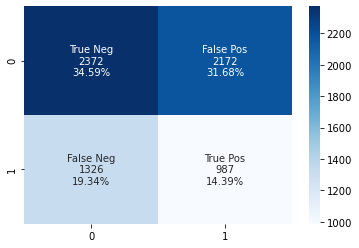

In [163]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,knn.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

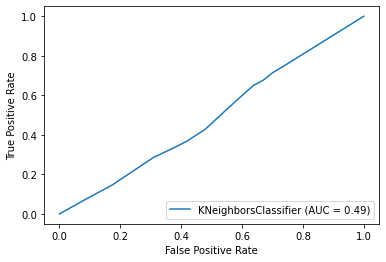

In [164]:
from sklearn import metrics
metrics.plot_roc_curve(knn, xtest_pca, y_test)  
plt.show()

In [165]:
# upsampled
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 12)  # n_neighbors means k
knn.fit(x_train_up, y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=knn.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=knn.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.6518885810121045
              precision    recall  f1-score   support

     class_0       0.76      0.69      0.72      4544
     class_1       0.49      0.58      0.53      2313

    accuracy                           0.65      6857
   macro avg       0.63      0.64      0.63      6857
weighted avg       0.67      0.65      0.66      6857



<AxesSubplot:>

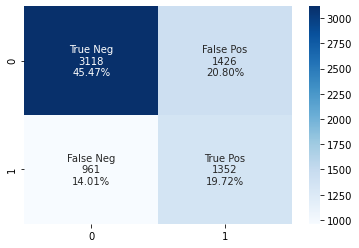

In [166]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,knn.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

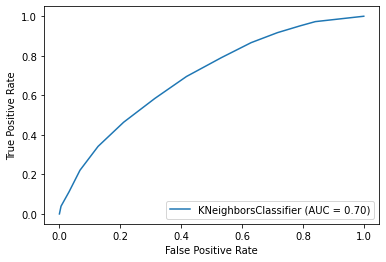

In [167]:
from sklearn import metrics
metrics.plot_roc_curve(knn, x_test, y_test)  
plt.show()

# 5.8. Kmeans Clustering

In [168]:
# NORMAL
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2,n_init=5,max_iter=10)
kmean.fit(x_train, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=kmean.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=kmean.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.662680472509844
              precision    recall  f1-score   support

     class_0       0.66      1.00      0.80      4544
     class_1       0.00      0.00      0.00      2313

    accuracy                           0.66      6857
   macro avg       0.33      0.50      0.40      6857
weighted avg       0.44      0.66      0.53      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
param_grid = {'n_init': [5, 10, 15], 
              'max_iter': [10, 15, 20],
             'n_clusters':[2]
              } 
  
grid = GridSearchCV(KMeans(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

In [ ]:
print(classification_report(y_test, grid_predictions))

<AxesSubplot:>

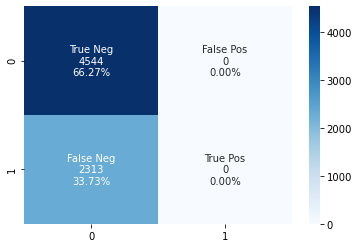

In [169]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,kmean.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [172]:
# pca
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2,n_init=5,max_iter=10)
kmean.fit(xtrain_pca, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=kmean.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=kmean.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.662680472509844
              precision    recall  f1-score   support

     class_0       0.66      1.00      0.80      4544
     class_1       0.00      0.00      0.00      2313

    accuracy                           0.66      6857
   macro avg       0.33      0.50      0.40      6857
weighted avg       0.44      0.66      0.53      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

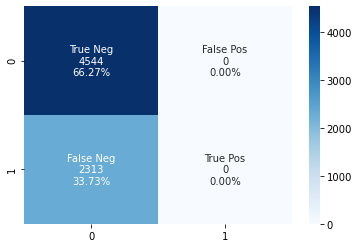

In [173]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,kmean.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [174]:
# upsampled
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2,n_init=5,max_iter=10)
kmean.fit(x_train_up, y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=kmean.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=kmean.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.662680472509844
              precision    recall  f1-score   support

     class_0       0.66      1.00      0.80      4544
     class_1       0.00      0.00      0.00      2313

    accuracy                           0.66      6857
   macro avg       0.33      0.50      0.40      6857
weighted avg       0.44      0.66      0.53      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

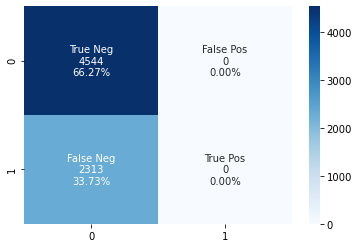

In [175]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,kmean.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# 5.9. Hierarchial Clustering

In [ ]:
# NORMAL
from sklearn.cluster import AgglomerativeClustering 
hcl = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete') 
hcl.fit(x_train, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=hcl.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=hcl.predict(x_test), target_names=['class_0','class_1']))

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,hcl.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(hcl, x_test, y_test)  
plt.show()

In [ ]:
# pca
from sklearn.cluster import AgglomerativeClustering 
hcl = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete') 
hcl.fit(xtrain_pca, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=hcl.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=hcl.predict(xtest_pca), target_names=['class_0','class_1']))

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,hcl.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(hcl, xtest_pca, y_test)  
plt.show()

In [ ]:
# upsampled
from sklearn.cluster import AgglomerativeClustering 
hcl = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete') 
hcl.fit(x_train_up, y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=hcl.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=hcl.predict(x_test), target_names=['class_0','class_1']))

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,hcl.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(hcl, x_test, y_test)  
plt.show()

# 5.10. Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
#normal
dcte = DecisionTreeClassifier(criterion='entropy',random_state=45, max_depth=4)
dcte.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=dcte.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=dcte.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.8509552282339216
              precision    recall  f1-score   support

     class_0       0.88      0.90      0.89      4544
     class_1       0.79      0.76      0.78      2313

    accuracy                           0.85      6857
   macro avg       0.83      0.83      0.83      6857
weighted avg       0.85      0.85      0.85      6857



<AxesSubplot:>

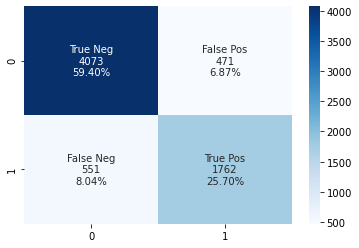

In [89]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,dcte.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

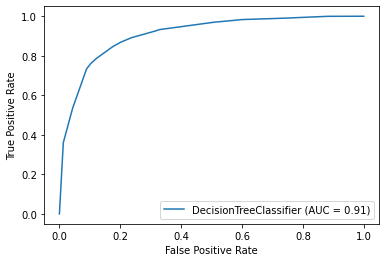

In [90]:
from sklearn import metrics
metrics.plot_roc_curve(dcte, x_test, y_test)  
plt.show()

In [91]:
#normal gini
dctg = DecisionTreeClassifier(criterion='gini',random_state=45, max_depth=4)
dctg.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=dctg.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=dctg.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.8592679014146128
              precision    recall  f1-score   support

     class_0       0.88      0.91      0.90      4544
     class_1       0.82      0.75      0.78      2313

    accuracy                           0.86      6857
   macro avg       0.85      0.83      0.84      6857
weighted avg       0.86      0.86      0.86      6857



<AxesSubplot:>

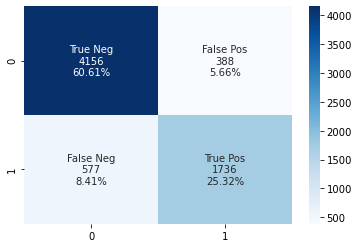

In [92]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,dctg.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

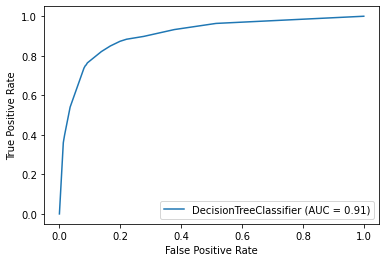

In [93]:
from sklearn import metrics
metrics.plot_roc_curve(dctg, x_test, y_test)  
plt.show()

In [94]:
#pca gini
dctg = DecisionTreeClassifier(criterion='gini',random_state=45, max_depth=4)
dctg.fit(xtrain_pca,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=dctg.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=dctg.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.6504302172961937
              precision    recall  f1-score   support

     class_0       0.66      0.96      0.78      4544
     class_1       0.35      0.04      0.07      2313

    accuracy                           0.65      6857
   macro avg       0.50      0.50      0.43      6857
weighted avg       0.56      0.65      0.54      6857



<AxesSubplot:>

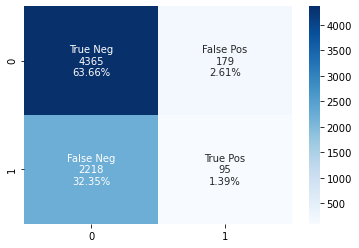

In [95]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,dctg.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

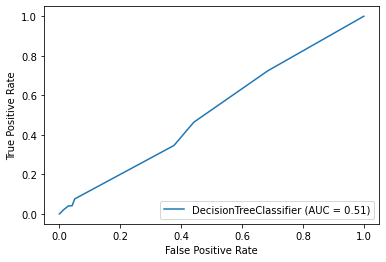

In [96]:
from sklearn import metrics
metrics.plot_roc_curve(dctg, xtest_pca, y_test)  
plt.show()

In [114]:
#upsampled gini
dctg = DecisionTreeClassifier(criterion='gini',random_state=45, max_depth=4)
dctg.fit(x_train_up,y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=dctg.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=dctg.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.8302464634679889
              precision    recall  f1-score   support

     class_0       0.92      0.82      0.86      4544
     class_1       0.70      0.86      0.77      2313

    accuracy                           0.83      6857
   macro avg       0.81      0.84      0.82      6857
weighted avg       0.85      0.83      0.83      6857



<AxesSubplot:>

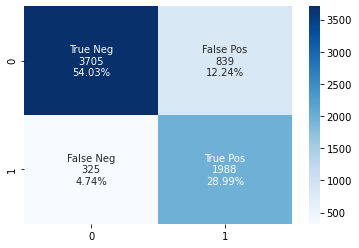

In [115]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,dctg.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

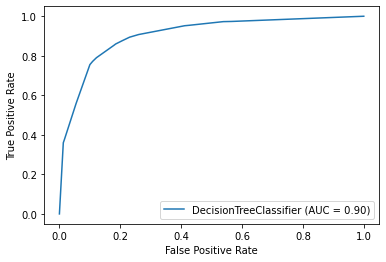

In [116]:
from sklearn import metrics
metrics.plot_roc_curve(dctg, x_test, y_test)  
plt.show()

In [117]:
model_importance = pd.DataFrame(columns=['variable name', 'gini value'])
model_importance['variable name'] = x_train.columns
model_importance['gini value'] = dctg.feature_importances_
model_importance.sort_values(["gini value"], axis=0,ascending=False)

variable name  gini value
5             A5    0.588389
0             IV    0.278648
8             A8    0.039352
7             A7    0.032632
13           A15    0.019981
6             A6    0.011820
9             A9    0.009792
11           A12    0.009361
4             A4    0.005819
2             A2    0.004206
3             A3    0.000000
10           A10    0.000000
1             A1    0.000000
12           A14    0.000000
14           A16    0.000000
15           A21    0.000000
16           A13    0.000000
17           A17    0.000000
18           A18    0.000000
19           A19    0.000000
20           A20    0.000000
21           A22    0.000000

# 5.11.Random Forest 

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
#normal
rf = RandomForestClassifier(n_estimators=150,criterion="entropy",max_features=13,min_samples_leaf=50)
rf.fit(x_train, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=rf.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=rf.predict(x_test), target_names=['class_0','class_1']))

<ipython-input-119-c61a3235f581>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Accuracy of classifier is : 0.8877059938748724
              precision    recall  f1-score   support

     class_0       0.91      0.93      0.92      4544
     class_1       0.85      0.81      0.83      2313

    accuracy                           0.89      6857
   macro avg       0.88      0.87      0.87      6857
weighted avg       0.89      0.89      0.89      6857



In [278]:
param_grid = {'n_estimators': [100, 150, 200], 
              'max_features': [5, 10, 15],
             'criterion':["gini"],
              "min_samples_leaf":[25,50,100]
              } 
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] criterion=gini, max_features=5, n_estimators=25 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=25, score=0.896, total=   0.8s
[CV] criterion=gini, max_features=5, n_estimators=25 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=25, score=0.894, total=   0.8s
[CV] criterion=gini, max_features=5, n_estimators=25 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s
C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=25, score=0.908, total=   0.9s
[CV] criterion=gini, max_features=5, n_estimators=25 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=25, score=0.913, total=   0.9s
[CV] criterion=gini, max_features=5, n_estimators=25 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=25, score=0.908, total=   0.9s
[CV] criterion=gini, max_features=5, n_estimators=35 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=35, score=0.902, total=   1.2s
[CV] criterion=gini, max_features=5, n_estimators=35 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=35, score=0.893, total=   1.4s
[CV] criterion=gini, max_features=5, n_estimators=35 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=35, score=0.905, total=   1.4s
[CV] criterion=gini, max_features=5, n_estimators=35 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=35, score=0.913, total=   1.4s
[CV] criterion=gini, max_features=5, n_estimators=35 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=35, score=0.912, total=   1.3s
[CV] criterion=gini, max_features=5, n_estimators=45 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=45, score=0.904, total=   1.7s
[CV] criterion=gini, max_features=5, n_estimators=45 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=45, score=0.894, total=   1.6s
[CV] criterion=gini, max_features=5, n_estimators=45 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=45, score=0.906, total=   1.7s
[CV] criterion=gini, max_features=5, n_estimators=45 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=45, score=0.912, total=   1.5s
[CV] criterion=gini, max_features=5, n_estimators=45 .................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=5, n_estimators=45, score=0.910, total=   1.5s
[CV] criterion=gini, max_features=10, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=25, score=0.898, total=   1.3s
[CV] criterion=gini, max_features=10, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=25, score=0.893, total=   1.3s
[CV] criterion=gini, max_features=10, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=25, score=0.906, total=   1.4s
[CV] criterion=gini, max_features=10, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=25, score=0.908, total=   1.6s
[CV] criterion=gini, max_features=10, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=25, score=0.904, total=   1.4s
[CV] criterion=gini, max_features=10, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=35, score=0.903, total=   2.1s
[CV] criterion=gini, max_features=10, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=35, score=0.895, total=   1.9s
[CV] criterion=gini, max_features=10, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=35, score=0.905, total=   2.1s
[CV] criterion=gini, max_features=10, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=35, score=0.912, total=   1.9s
[CV] criterion=gini, max_features=10, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=35, score=0.906, total=   1.9s
[CV] criterion=gini, max_features=10, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=45, score=0.901, total=   2.4s
[CV] criterion=gini, max_features=10, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=45, score=0.895, total=   2.7s
[CV] criterion=gini, max_features=10, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=45, score=0.907, total=   2.6s
[CV] criterion=gini, max_features=10, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=45, score=0.909, total=   2.4s
[CV] criterion=gini, max_features=10, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=10, n_estimators=45, score=0.913, total=   2.4s
[CV] criterion=gini, max_features=15, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=25, score=0.898, total=   1.9s
[CV] criterion=gini, max_features=15, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=25, score=0.891, total=   2.0s
[CV] criterion=gini, max_features=15, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=25, score=0.902, total=   2.0s
[CV] criterion=gini, max_features=15, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=25, score=0.908, total=   2.0s
[CV] criterion=gini, max_features=15, n_estimators=25 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=25, score=0.907, total=   1.9s
[CV] criterion=gini, max_features=15, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=35, score=0.898, total=   2.9s
[CV] criterion=gini, max_features=15, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=35, score=0.888, total=   2.7s
[CV] criterion=gini, max_features=15, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=35, score=0.906, total=   2.9s
[CV] criterion=gini, max_features=15, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=35, score=0.908, total=   2.7s
[CV] criterion=gini, max_features=15, n_estimators=35 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=35, score=0.905, total=   2.8s
[CV] criterion=gini, max_features=15, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=45, score=0.901, total=   3.4s
[CV] criterion=gini, max_features=15, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=45, score=0.892, total=   3.4s
[CV] criterion=gini, max_features=15, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=45, score=0.904, total=   3.6s
[CV] criterion=gini, max_features=15, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=45, score=0.908, total=   3.4s
[CV] criterion=gini, max_features=15, n_estimators=45 ................


C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  criterion=gini, max_features=15, n_estimators=45, score=0.911, total=   3.9s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.5min finished
C:\Users\govin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_features': [5, 10, 15],
                         'n_estimators': [25, 35, 45]},
             verbose=3)

In [281]:
print(grid.best_params_)

{'max_iter': 20, 'n_clusters': 2, 'n_init': 10}


In [282]:
print(grid.best_estimator_)

KMeans(max_iter=20, n_clusters=2)


In [283]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      4544
           1       0.74      0.29      0.42      2313

    accuracy                           0.73      6857
   macro avg       0.73      0.62      0.62      6857
weighted avg       0.73      0.73      0.68      6857



<AxesSubplot:>

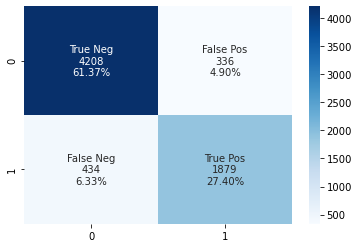

In [120]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,rf.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [121]:
from sklearn import metrics
metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()

In [122]:
# pca
rf = RandomForestClassifier(n_estimators=150,criterion="gini",max_features=5,min_samples_leaf=50)
rf.fit(xtrain_pca, y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=rf.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=rf.predict(xtest_pca), target_names=['class_0','class_1']))

<ipython-input-122-f9290a1aa629>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtrain_pca, y_train)


Accuracy of classifier is : 0.5296777016187837
              precision    recall  f1-score   support

     class_0       0.65      0.64      0.64      4544
     class_1       0.31      0.32      0.31      2313

    accuracy                           0.53      6857
   macro avg       0.48      0.48      0.48      6857
weighted avg       0.53      0.53      0.53      6857



<AxesSubplot:>

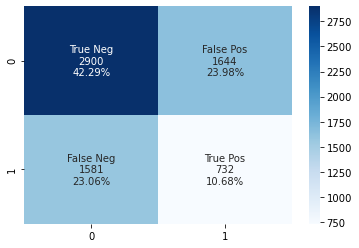

In [123]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,rf.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

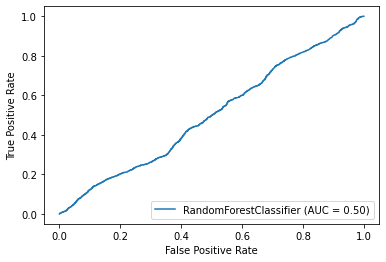

In [124]:
from sklearn import metrics
metrics.plot_roc_curve(rf, xtest_pca, y_test)  
plt.show()

In [125]:
#upsampled
rf = RandomForestClassifier(n_estimators=150,criterion="entropy",max_features=13,min_samples_leaf=50)
rf.fit(x_train_up, y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=rf.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=rf.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.8821642117544115
              precision    recall  f1-score   support

     class_0       0.94      0.88      0.91      4544
     class_1       0.79      0.88      0.83      2313

    accuracy                           0.88      6857
   macro avg       0.86      0.88      0.87      6857
weighted avg       0.89      0.88      0.88      6857



<AxesSubplot:>

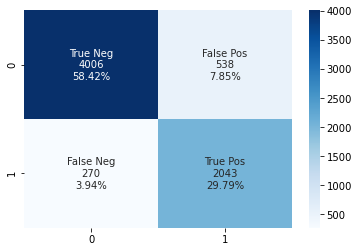

In [126]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,rf.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

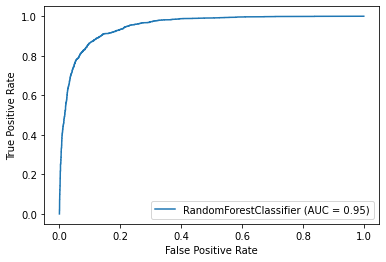

In [127]:
from sklearn import metrics
metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()

# 5.12. Stochastic Gradient Descent

In [128]:
from sklearn.linear_model import SGDClassifier

In [129]:
# normal
sgd = SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 101)
sgd.fit(x_train,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=sgd.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=sgd.predict(x_test), target_names=['class_0','class_1']))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of classifier is : 0.7071605658451218
              precision    recall  f1-score   support

     class_0       0.71      0.93      0.81      4544
     class_1       0.67      0.26      0.38      2313

    accuracy                           0.71      6857
   macro avg       0.69      0.60      0.59      6857
weighted avg       0.70      0.71      0.66      6857



<AxesSubplot:>

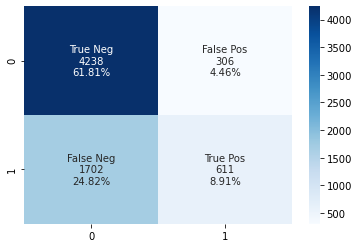

In [131]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,sgd.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

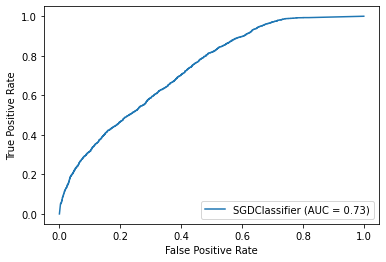

In [132]:
from sklearn import metrics
metrics.plot_roc_curve(sgd, x_test, y_test)  
plt.show()

In [133]:
# pca
sgd = SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 101)
sgd.fit(xtrain_pca,y_train)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=sgd.predict(xtest_pca)))
print (classification_report(y_true=y_test, y_pred=sgd.predict(xtest_pca), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.5658451217733703
              precision    recall  f1-score   support

     class_0       0.69      0.63      0.66      4544
     class_1       0.38      0.45      0.41      2313

    accuracy                           0.57      6857
   macro avg       0.53      0.54      0.53      6857
weighted avg       0.58      0.57      0.57      6857



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:>

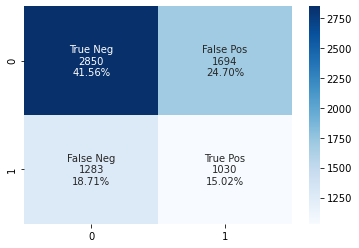

In [134]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,sgd.predict(xtest_pca))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

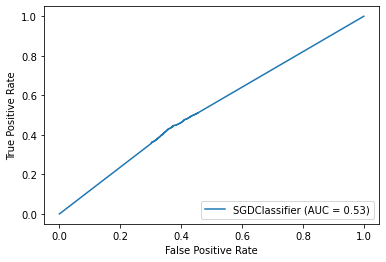

In [135]:
from sklearn import metrics
metrics.plot_roc_curve(sgd, xtest_pca, y_test)  
plt.show()

In [136]:
# upsampled
sgd = SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 101)
sgd.fit(x_train_up,y_train_up)
print ("Accuracy of classifier is :", accuracy_score(y_true=y_test, y_pred=sgd.predict(x_test)))
print (classification_report(y_true=y_test, y_pred=sgd.predict(x_test), target_names=['class_0','class_1']))

Accuracy of classifier is : 0.617908706431384
              precision    recall  f1-score   support

     class_0       0.87      0.50      0.63      4544
     class_1       0.46      0.86      0.60      2313

    accuracy                           0.62      6857
   macro avg       0.67      0.68      0.62      6857
weighted avg       0.73      0.62      0.62      6857



<AxesSubplot:>

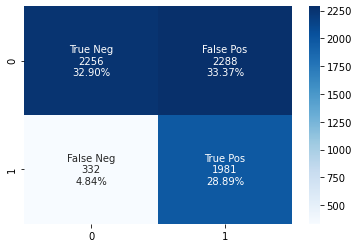

In [137]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,sgd.predict(x_test))
#uptill here , is also fine , just type cm in next cell, and you can skip the codes below this.
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

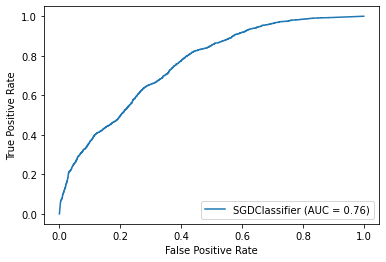

In [138]:
from sklearn import metrics
metrics.plot_roc_curve(sgd, x_test, y_test)  
plt.show()

### The Evaluation of the model is done simultaneously after each model which includes the confusion matrix, classifier report, ROC-AUC curve and its Accuracy. 